# Project

# Census Income Data Set

# Income Classification Model

# Introduction

The income dataset was extracted from 1994 U.S. Census database.
The importance of census statistics

The census is a special, wide-range activity, which takes place once a decade in the entire 
country. The purpose is to gather information about the general population, in order to 
present a full and reliable picture of the population in the country - its housing conditions 
and demographic, social and economic characteristics. The information collected includes 
data on age, gender, country of origin, marital status, housing conditions, marriage, 
education, employment, etc.

This information makes it possible to plan better services, improve the quality of life and 
solve existing problems. Statistical information, which serves as the basis for constructing 
planning forecasts, is essential for the democratic process since it enables the citizens to 
examine the decisions made by the government and local authorities, and decide whether 
they serve the public they are meant to help.
Objective of the porject

The goal of this machine learning project is to predict whether a person makes over 50K a 
year or not given their demographic variation. To achieve this, several classification 
techniques are explored and the random forest model yields to the best prediction result.
Features Description

1. Categorical Attributes

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, 
Without-pay, Never-worked. Individual work category
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th,
7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. Individual's highest 
education degree

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, 
Married-spouse-absent, Married-AF-spouse. Individual marital status
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Profspecialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transportmoving, Priv-house-serv, Protective-serv, Armed-Forces. Individual's occupation
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
Individual's relation in a family

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. Race of Individual
sex: Female, Male.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, 
Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, 
Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, DominicanRepublic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland,
Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. 
Individual's native country



# 1. Continuous Attributes

age: continuous. Age of an individual fnlwgt: final weight, continuous. The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous. Individual's working hour per week

# 2. Fetching Data:

# 2.1 Import packages

In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

# 2.2 Import data

In [6]:
pd.read_csv('adult.csv')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
data = pd.read_csv("adult.csv",na_values='?',skipinitialspace=True)
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [10]:
data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [11]:
data.shape

(48842, 15)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [13]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
data.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

therer were :               number of    null recods  in 
    
    work calss               -   2799
    
    occupation               -  2809
    
    native-country           -  857
    
out of 48842  recocord which were very lees no.of recods so we can drop the null records,

In [15]:
data=data.dropna()

In [16]:
data.shape

(45222, 15)

Classifing the income into  three catagories :  <50k , >50k  ,  50k per year.

In [17]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

Assigning the 0, 1 to the  <==50k and >50k respectively

In [18]:
data['income']=data['income'].map({'<=50K': 0, '>50K': 1})
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


# 4.Summary

# 4.1 Summary statistics for numeric attribute

In [19]:
data_num = data.drop(["educational-num","income"], axis=1)      # droping Educational num and income column which  no need  now
data_num.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


In [20]:
data['age'].median()

37.0

In [21]:
data['age'].mean()

38.547941267524656

In [22]:
diff1=data.age.quantile(0.25)-data['age'].min()
diff1

11.0

In [23]:
data.age.quantile(0.75)

47.0

In [24]:
diff2=data['age'].max()-data.age.quantile(0.75)
diff2

43.0

Summary of attributes explain following things:

# For Age :


1. The mean value is 38 i.e. on an average the value of age attribute is 38.
2. Age is having the standerd deviation 13.71 which indicates the deviation of an 
observation from the mean.
3. The value of Age attribute varies from 17 to 90.
4. The 1st quartile is 28 i.e. 25% of the observations lies below 28.
5. 3rd quartile is 48 which indicates that in 75% of the observations the value of age is 
less than 48.
6. The difference between 1st quartile and the minimum is lesser than the difference 
between 3rd quartile and the maximum which is showing that the data is more 
dispersed after the value 48.
7. The difference between mean & median is not significantly high but the difference 
between 3rd quartile & maximum made the distribution right skewed.


# For fnlwgt :


In [25]:
data['fnlwgt'].median()

178316.0

In [26]:
data['fnlwgt'].max()

1490400

In [27]:
data['fnlwgt'].min()

13492

In [28]:
data['fnlwgt'].mean()

189734.7343107337

1. This is the sampling weight corresponding to the observations.
2. finalweight seems to be rightly skewed since there is very large distance between 
median & maximum value as compared to minimum & median value.


# For capital-gain :

In [29]:
data['capital-gain'].median()

0.0

In [30]:
data['capital-gain'].mode()

0    0
Name: capital-gain, dtype: int64

In [31]:
data['capital-gain'].mean()

1101.4303436380524

In [32]:
data['capital-gain'].std()

7506.430083746913

1. For capital-gain, the mean is 1079.06 and median is 0, which indicates that the 
distribution is highly right skewed.
2. From the qurtiles it is clearly visible that 75% observations are having capital gain 
zero.
3. capital-gain is concentrated on the one particular value i.e. zero and other are 
spread after 3rd quartile which results as the large standard deviation(7452.01).
4. capital-gain shows that either a person has no gain or has gain of very large 
amount(10k or 99k).

# For capital-loss :

1. This attribute is similar to the capital-gain i.e. most of the values are centered on 
0(this can be told using the summary statistic as minimum is 0 and values lie under 
75 percentile is also zero.
2. Mean is 87 but median is 0(i.e. mean is greater than median this tells us that it is 
right skewed distribution).

# For hours-per-week :

1. This attribute means number of working hours spend by an individual in a week.
2. In this data the hours per week atrribute varies within the range of 1 to 99.
3. 75 percentage of the people spend 45 or less working hours per week.
4. The IQR is very less i.e. [40-45] which indicates that 50% of the observations are 
concentrated between 40 & 45.
5. Observations are very sparse below 25th percentile and after 75th percentile.
6. Using quartiles we can say that data is approximately symmetric.
7. Minimum is 1 hour per week & maximum value is 99 hours per week means person 
spending 99 working hours per week are very rare events. We will later analyze that
which workclass they belong.

# 4.2 Summary and count for categorical attribute

In [33]:
data.describe(include=["O"])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,45222,45222,45222,45222,45222,45222,45222,45222
unique,7,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
freq,33307,14783,21055,6020,18666,38903,30527,41292


In [34]:
data['native-country'].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

*. Native-country has maximum number of unique categories i.e. 41 categories.

*.But the native-country is highly biased toward the US which has frequency of 44689 out of total 48842(nearly 91%).

*.Occupation has more or less uniform distribution of categories as comparerd to the other attributes.

*.Race is also biased to the white race category(41762) with 85.5%.

*.The top category in workclass is Private having frequency(36705) and percentage(75.5%).

# 5. EDA

# 5.1.Univariate analysis

# 5.1.1 Age

# i. distibution plot of Age

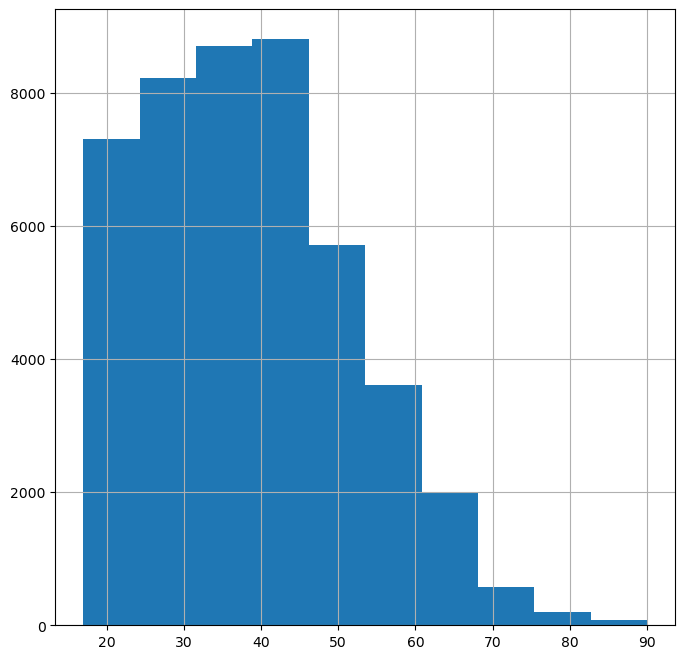

In [35]:
data['age'].hist(figsize=(8,8))
plt.show()

In [36]:
data[data["age"]>70].shape
#no. of people whose age is greater than 70

(636, 15)

# ii. Description about the distribution

The above histogram shows that :
    
• "age" attribute is not symmetric.

• it is right-skewed(But this is totally fine as younger adult earn wages not the older 
ones)

• Minimum and Maximum age of the people is 17 and 90 respectively.

• This dataset has fewer observations(636) of people's age after certain age i.e. 70 
years.

# 5.1.2 Hours per week

# hour/week distibition plot.

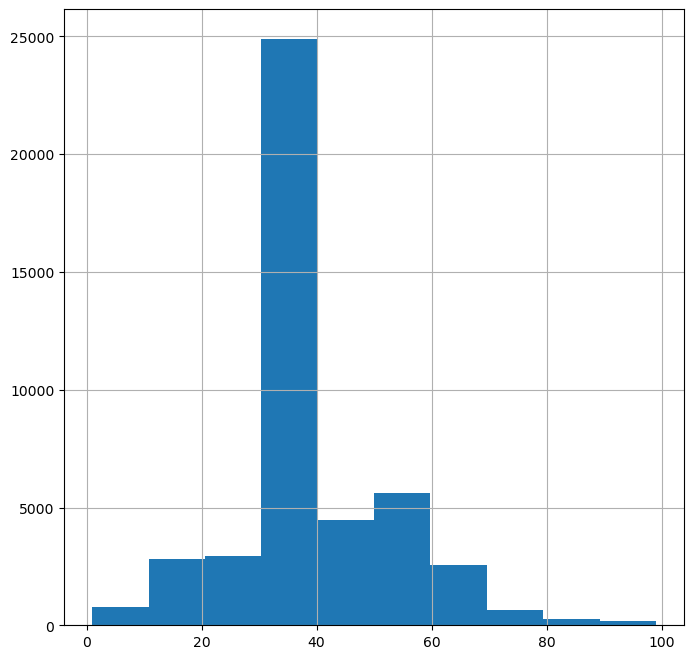

In [37]:
data['hours-per-week'].hist(figsize=(8,8))
plt.show()

# ii. Description about the distribution

This histogram of "hours-per-week" shows that:
    
• In this data the hours per week atrribute varies within the range of 1 to 99.

• Most people work 30-40 hours per week, they are roughly 27,000 people.


# 5.1.3 fnlwgt

fnlwght variable may stand for a weight of an observation.

# i. Distribution

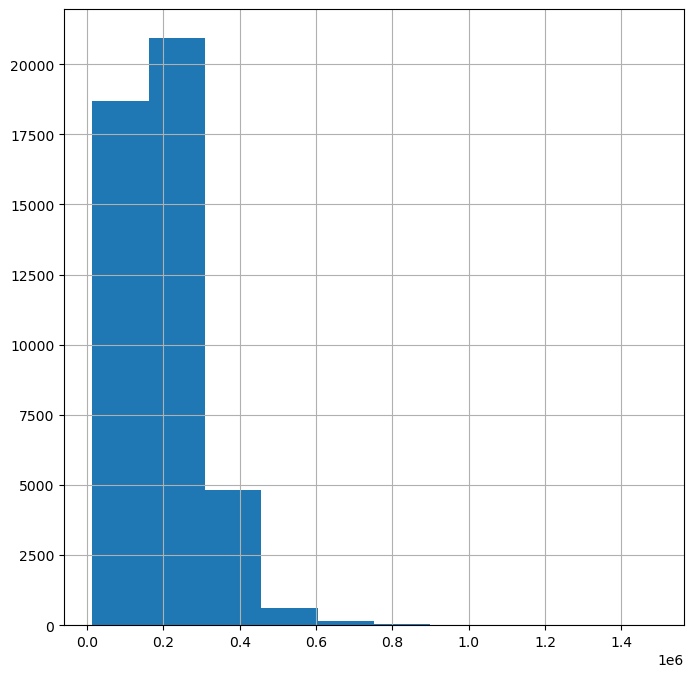

In [38]:
data['fnlwgt'].hist(figsize=(8,8))
plt.show()

ii. Description about distribution


The above histogram shows that :
    
• This is the sampling weight corresponding to the observations.

• The distribution of finalweight seems to be rightly skewed since mean(189664.1) is 
greater than median(178144.5).

# 5.1.4 capital-gain

i. Distribution

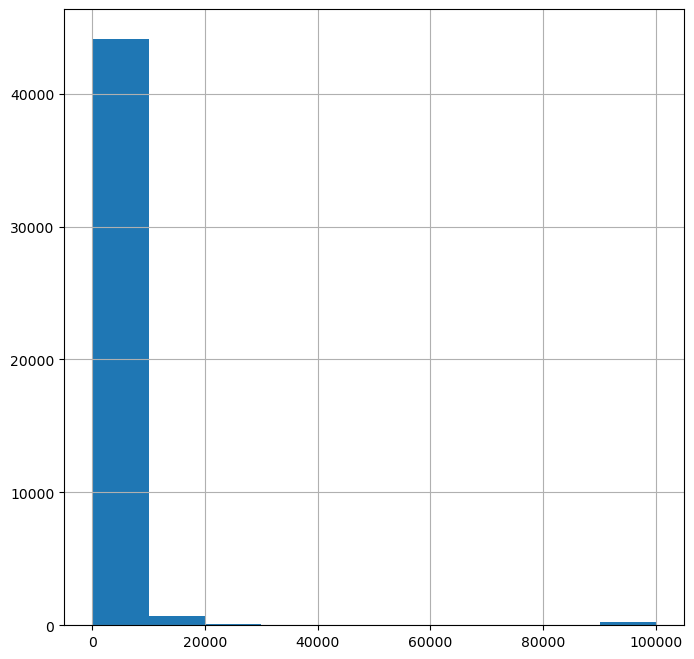

In [39]:
data["capital-gain"].hist(figsize=(8,8))
plt.show()

In [40]:
data['capital-gain'].std()

7506.430083746913

In [41]:
data['capital-gain'].nunique()

121

In [42]:
data[data["capital-loss"]>0].nunique().sum()

2344

In [43]:
data[data["capital-loss"]>0].value_counts().sum()

2140

In [44]:
data[data["capital-loss"]>0].shape

(2140, 15)

In [45]:
data[data["capital-gain"]<0].shape

(0, 15)

In [46]:
data[data["capital-gain"]==0].shape

(41432, 15)

In [47]:
data['capital-gain'].value_counts().sum()

45222

ii. Description about distribution

• This histogram shows that most of the "capital-gain" values are centered on 0 and 
few on 10k and 99k.

• capital-gain is concentrated on the one particular value and other are spread with 
large standard deviation(7452.01).

• capital-gain shows that either a person has no gain or has gain of very large 
amount(10k or 99k)

# 5.1.5 capital-loss

# i. Distribution

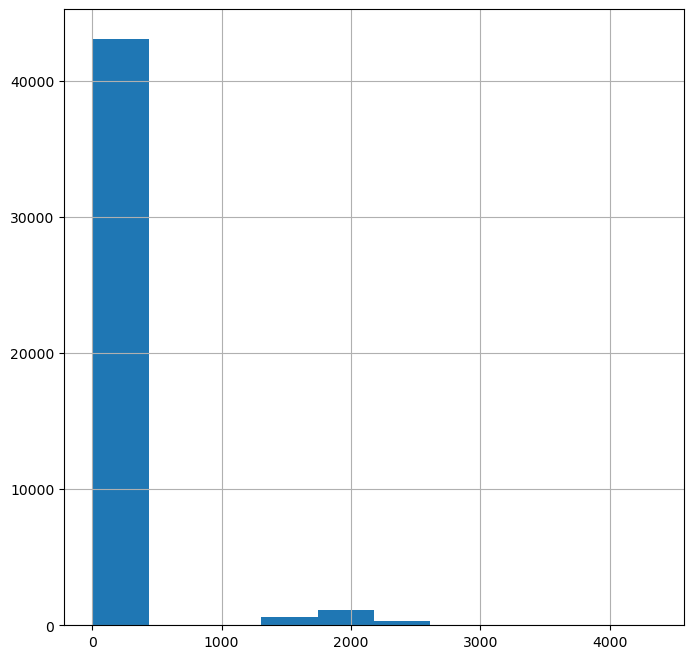

In [48]:
data["capital-loss"].hist(figsize=(8,8))
plt.show()

In [49]:
data.shape

(45222, 15)

In [50]:
data[data["capital-loss"]>0].shape

(2140, 15)

In [51]:
data[data["capital-loss"]<0].shape

(0, 15)

In [52]:
data[data["capital-loss"]==0].shape

(43082, 15)

ii. Description about distribution

• This histogram shows that most of the "capital-loss" values are centered on 0 and 
only few are non zero(2282).

• This attribute is similar to the capital-gain i.e. most of the values are centered on 
0(nearly 43000 of them)


# Relation between capital gain and capital loss

#### Let's explore more about capital loss and capital gain.

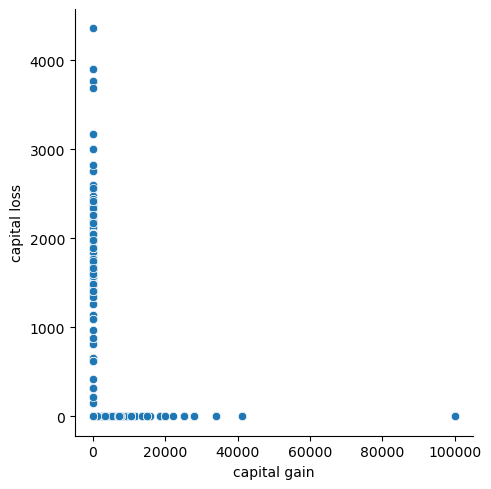

In [53]:
sns.relplot('capital-gain','capital-loss', data=data)
plt.xlabel("capital gain")
plt.ylabel("capital loss")
plt.show()

Possibilities for capital gain and capital loss

*  Both capital gain and capital loss can be zero
*  If capital.gain is zero there is possibility of capital loss being high or above zero.
*  If capital loss is zero there is possibility of capital.gain being high or above zero.

With the help of this, we can do one modification later(It could be combine these together i.e. capital-change = [capital-gain - capital-loss])

# 5.1.6 Workclass

# i. Distribution

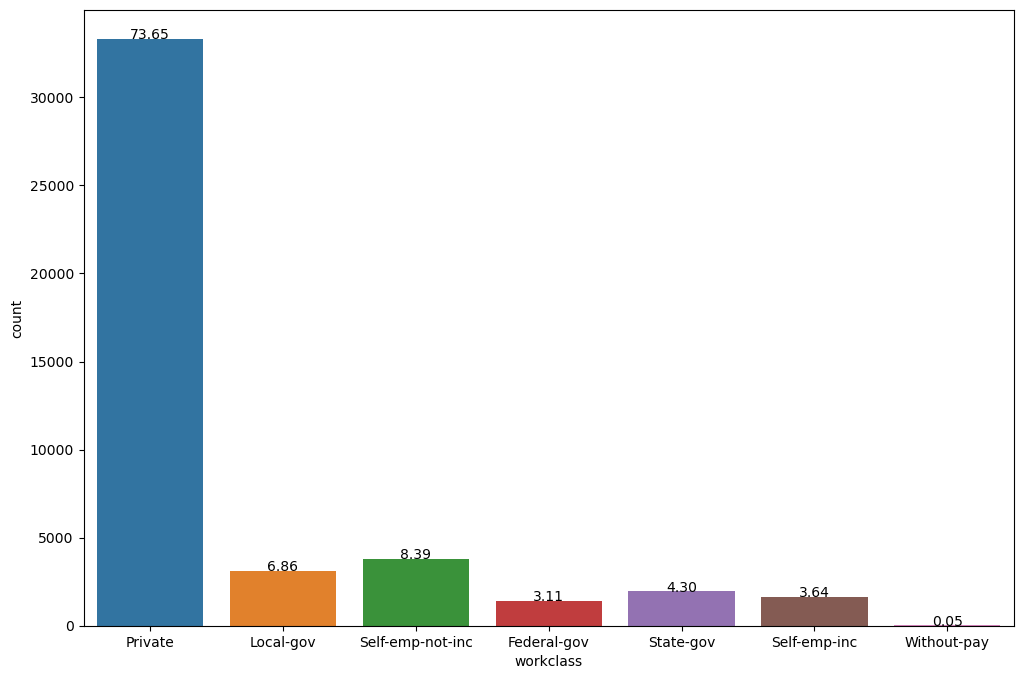

In [54]:
plt.figure(figsize=(12,8))

total = float(len(data["income"]) )

ax = sns.countplot(x="workclass", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

# ii. Description about distribution


Summary distribution shows that:
    
• There are 8 unique categories present in the worclass attribute.

• Most of them belong to the private workclass(36705) i.e. 75.15%.

• without-pay and never-worked has minimum count in workclass attribute(less than 
1%).

• There is huge imbalance in the categories of workclass attribute.


# 5.1.7. Education

# i. Distribution

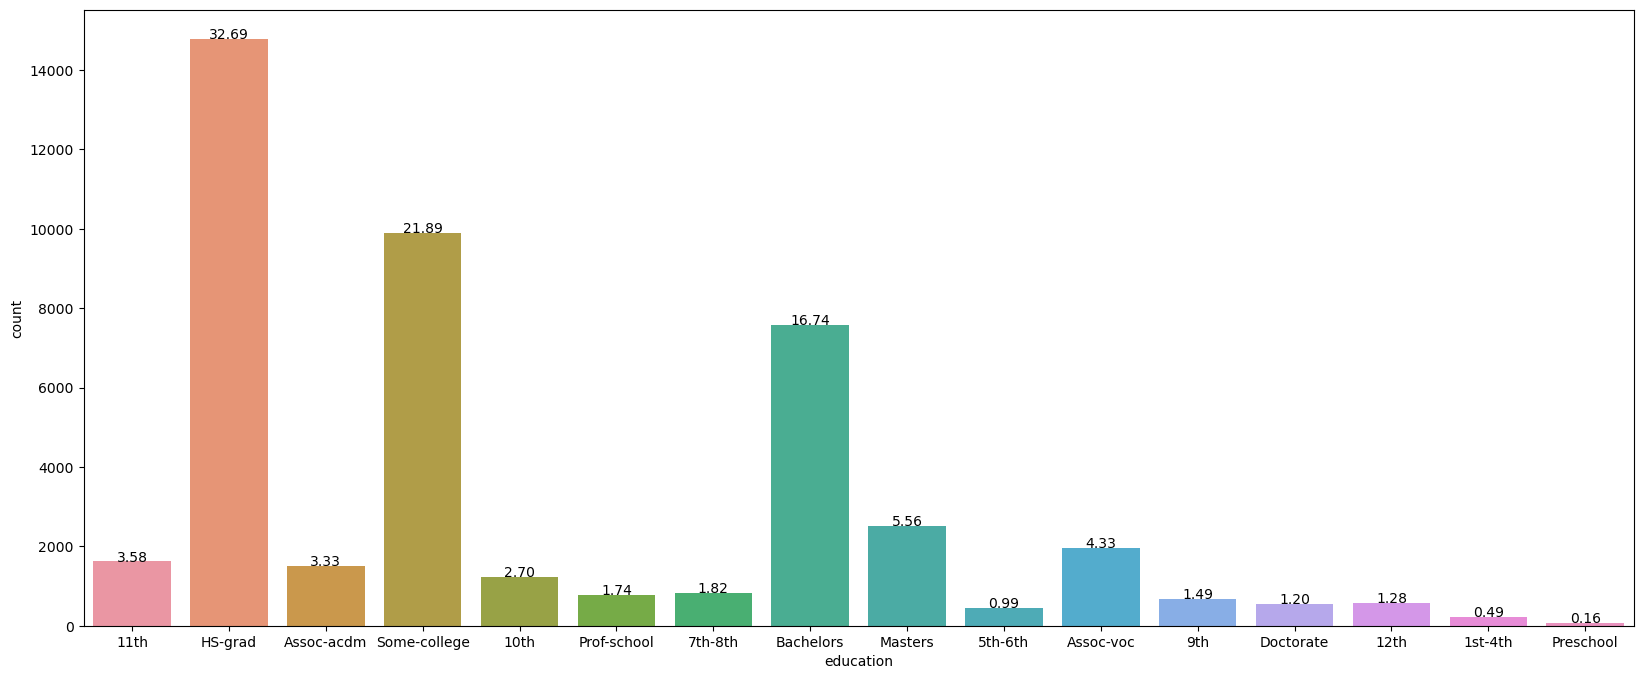

In [55]:
plt.figure(figsize=(20,8))
total = float(len(data["income"]) )

ax = sns.countplot(x="education", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

# ii. Description about distribution


• There are 16 unique categories present in the education attribute.

• Hs-grad has 32.32% of all the education attribute.

• HS-grad (15784) has the maximum number of observations followed by somecollege(10878) and Bachelors(8025).

• Pre-school has minimum samples i.e. 83.

# 5.1.8 . Marital status:

# i. Distribution

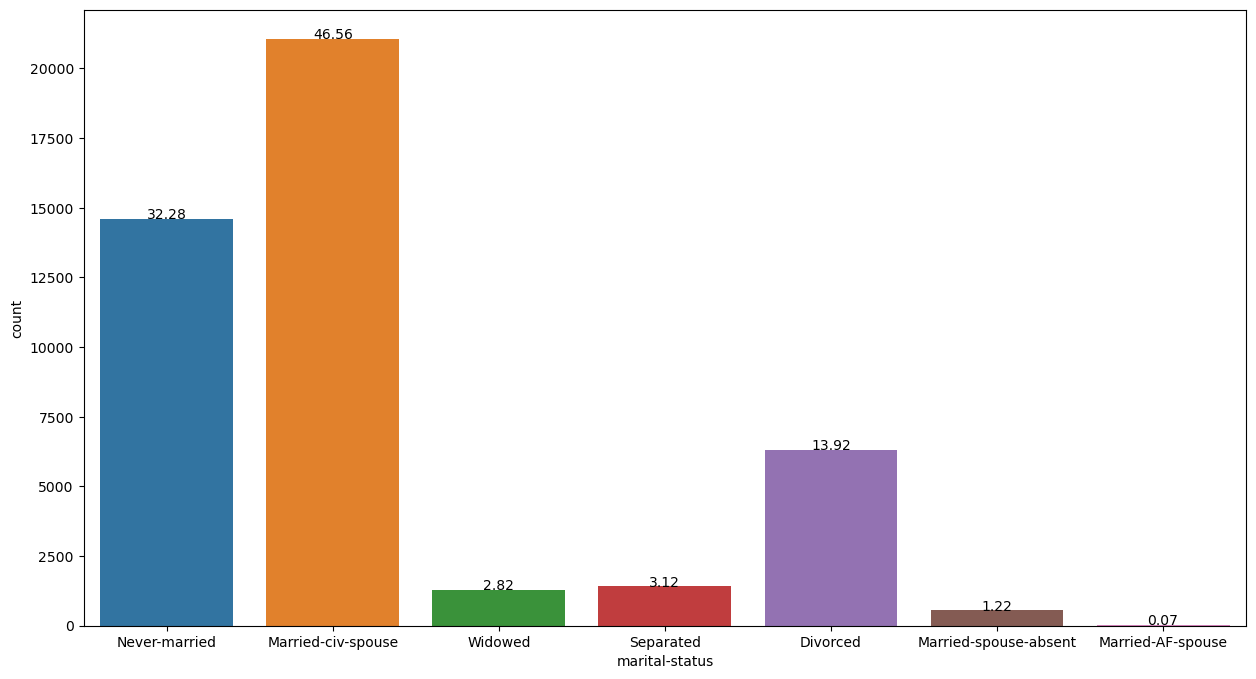

In [56]:
plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x="marital-status", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

# ii. Description about distribution

• This marital-status attribute has 7 unique categories.

• Two of them are dominate over other categories(these are Never-married(33%) and
married-civ-spouse(45.82%).
                                                 
• Married-civ-spouse has maximum number of samples.
                                                 
• Married-AF-spouse has minimum number of obs.

# 5.1.9 Occupation

# i. Distribution

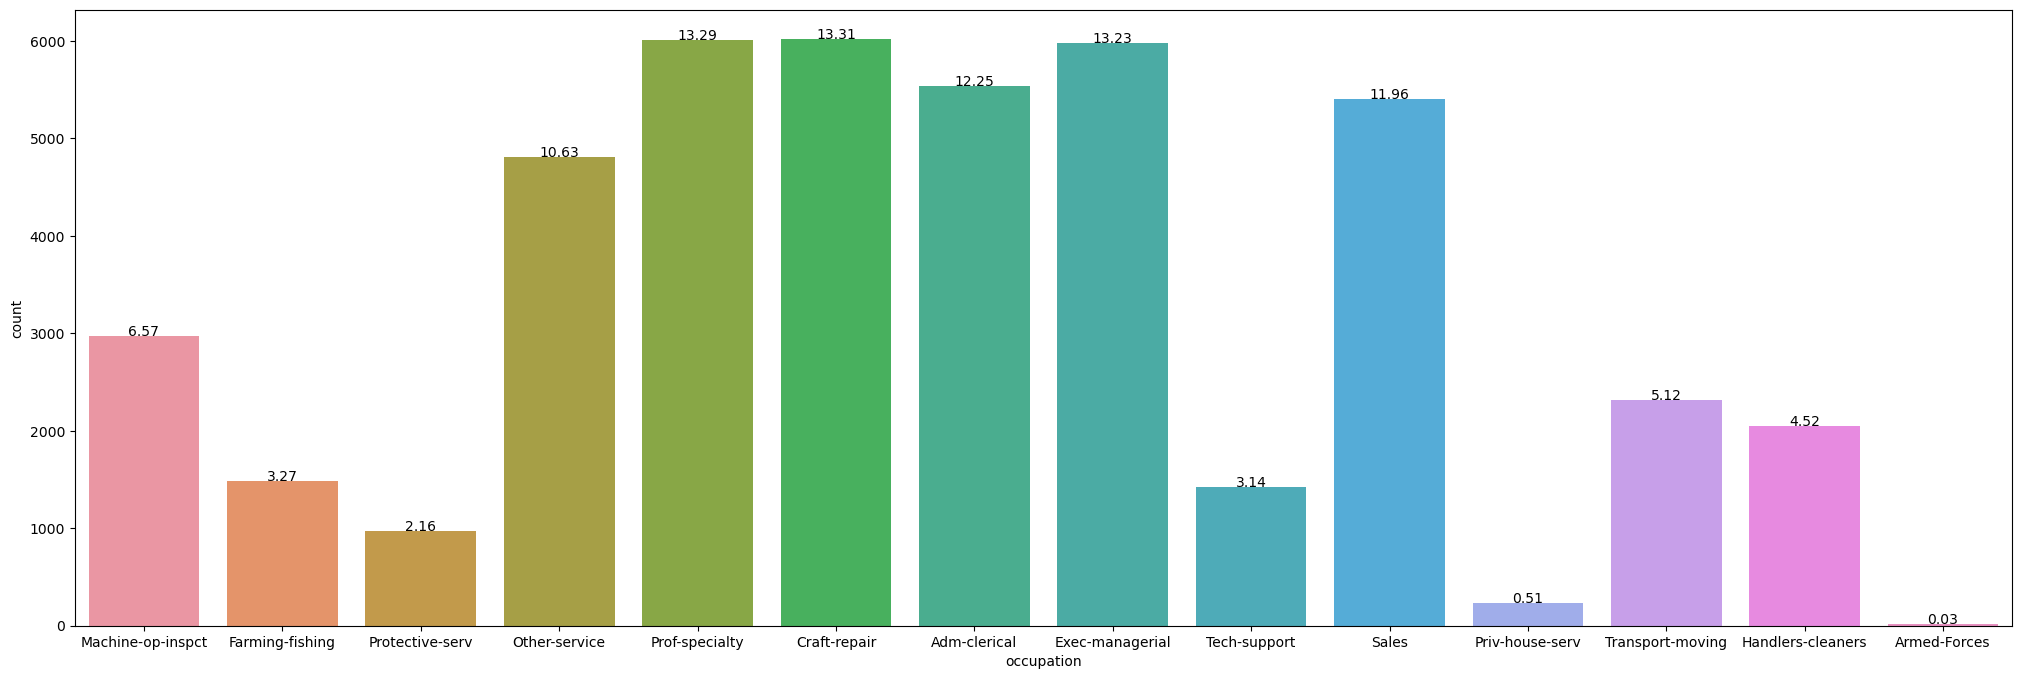

In [57]:
plt.figure(figsize=(25,8))
total = float(len(data) )

ax = sns.countplot(x="occupation", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

# ii. Description about distribution


• There are 14 unique categories present in the occupation attribute.

• Prof-specialty has the maximum count(8981) but Craft-repair, Exec-managerial and 
Adm-clerical Sales has comparable number of observations.

• Armed-Forces has minimum samples in the occupation attribute.

# 5.1.10 Relationship

# i. Distribution

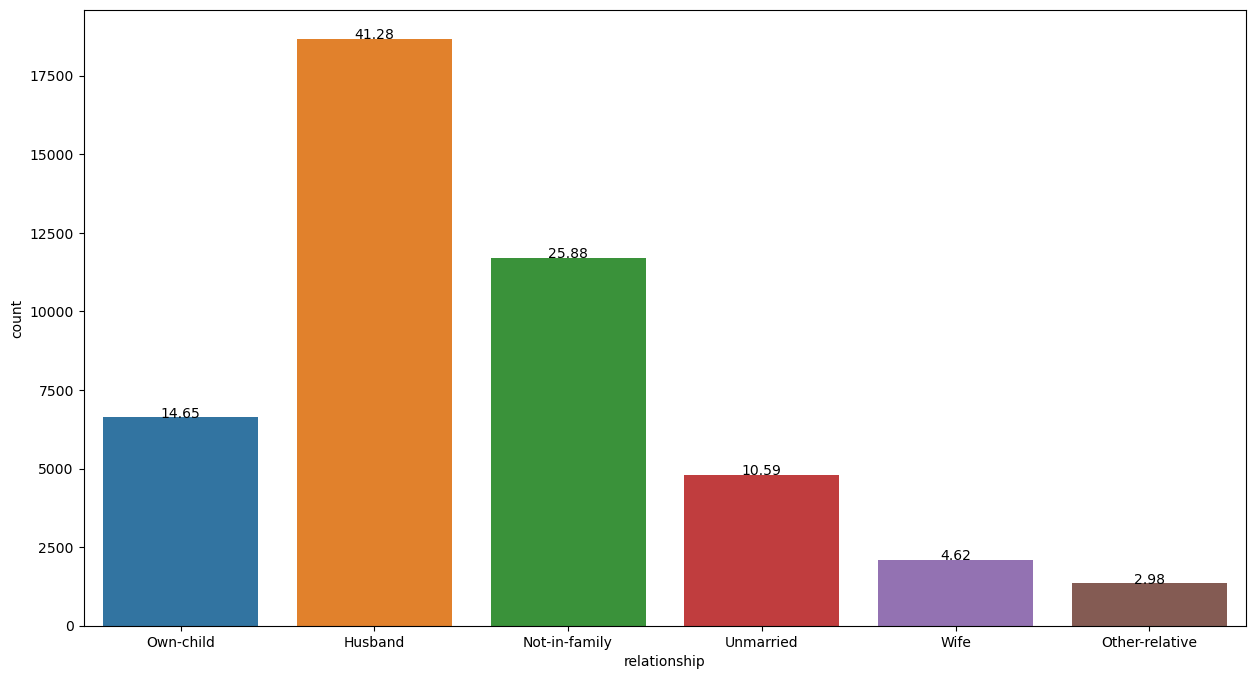

In [58]:
plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x="relationship", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

# ii. Description about distribution


• There are 6 unique categories in the relationship attribute.

• Husband has maximum percentage (40.37%) among all categories followed by notin-family(25.76%)


# 5.1.11 Race

# i. Distribution

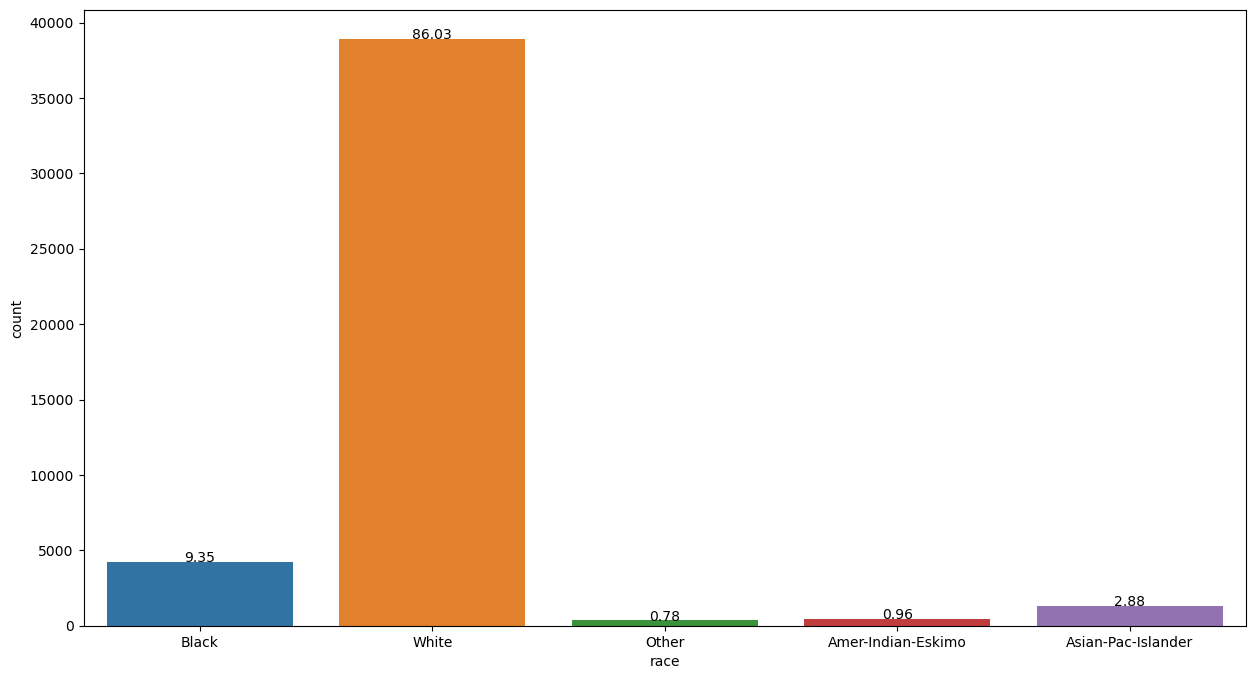

In [59]:
plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x="race", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

# ii. Description about distribution

# This distribution explains that:
    
• There are 5 unique categories in the race attribute.

• Most of them are "white" which is roughly 85.50%.

• This dataset is totally bias toward the "white" race.

• Second major race in the dataset is the "black" with just 9.59%.

# 5.1.12 Gender

# i. Distribution

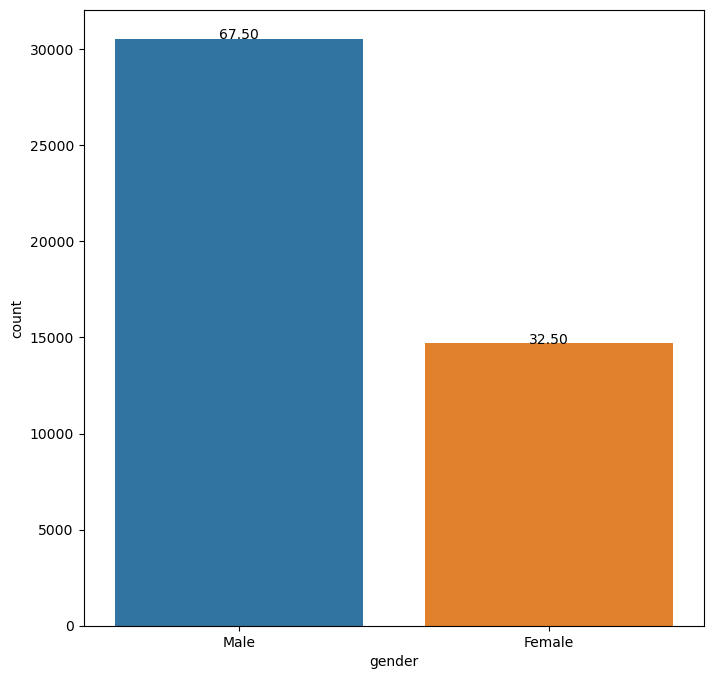

In [60]:
plt.figure(figsize=(8,8))
total = float(len(data) )

ax = sns.countplot(x="gender", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

# ii. Description about distribution


This distribution explains that:
    
• Gender has 2 unique categories(male and female).

• But the frequency of male(32650) is higher than the female(16192) categories.

• Distribution shows that this dataset is skewed toward the male with nearly 67%.

# 5.1.13 Native-country

# distribution

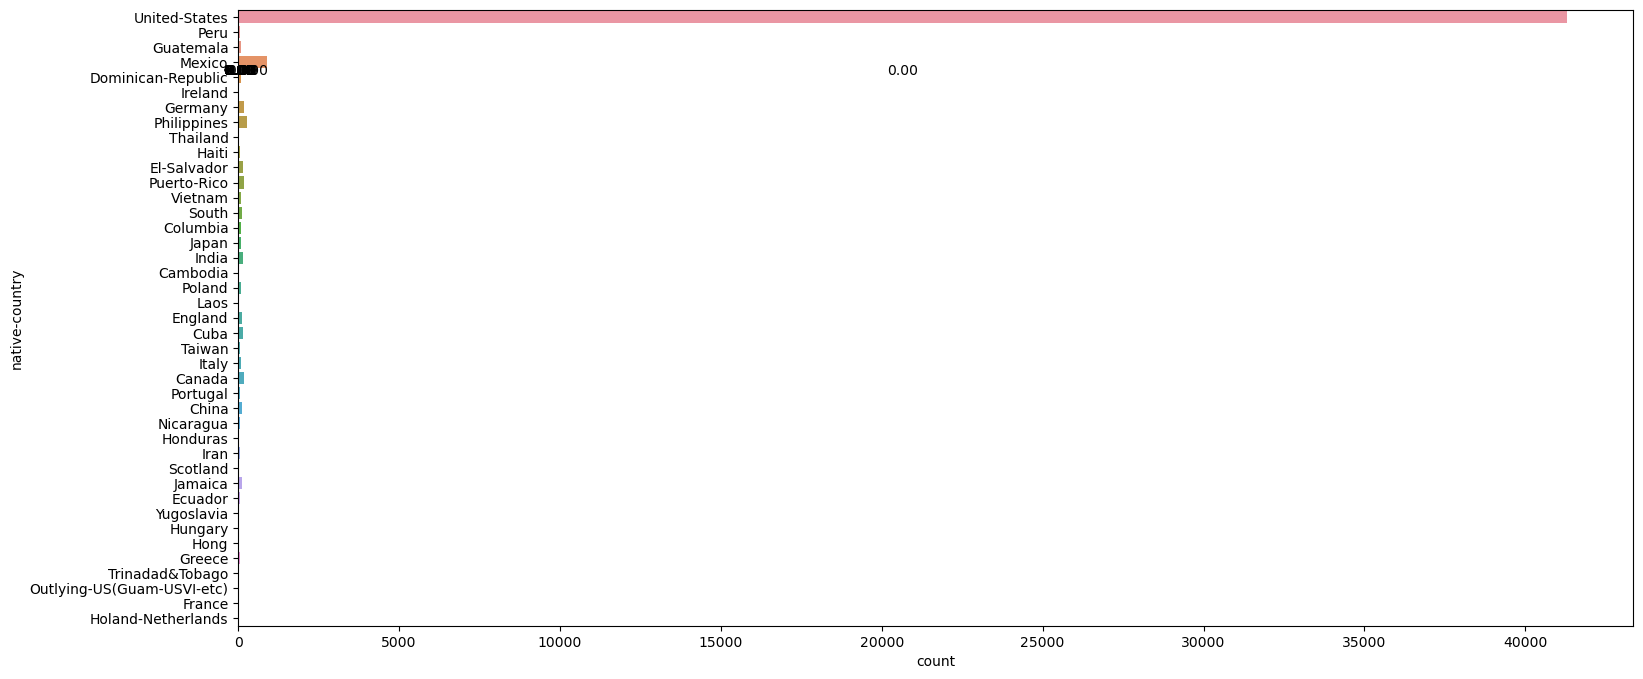

In [61]:
plt.figure(figsize=(18,8))
total = float(len(data) )

ax = sns.countplot(y="native-country", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

# ii. Description about distribution


This distribution explains that:
    
• This dataset is taken from the US.

• As 91.5% of them have native country America and others are immigrants.

# 5.1.14 Income(Target variable)

# i. Distribution

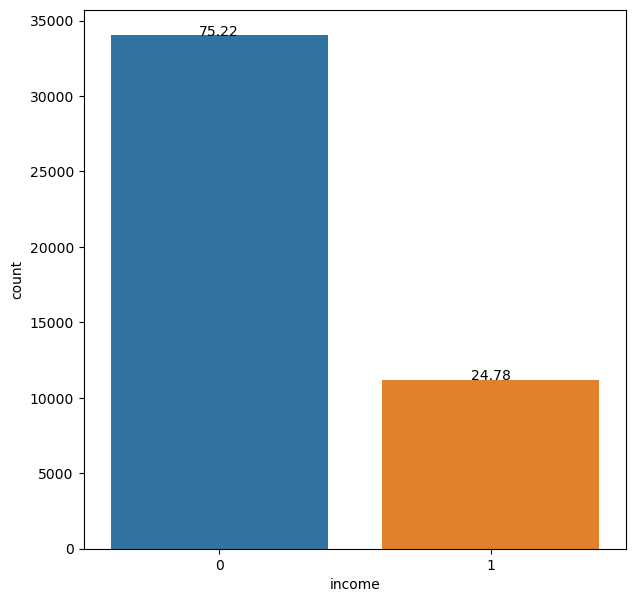

In [62]:
plt.figure(figsize=(7,7))
total = float(len(data) )

ax = sns.countplot(x="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

# ii. Description about distribution


This distibution says that:
    
• This dataset not balance , i.e. 23.93%of them are belong to income group 1 
(who earns more than 50k) and 76% fall under the income group 0 (who 
earns less than 50k).

# 5.2.Bivariate analysis

# 5.2.1 Age

# i. Boxplot (Relationship with income)


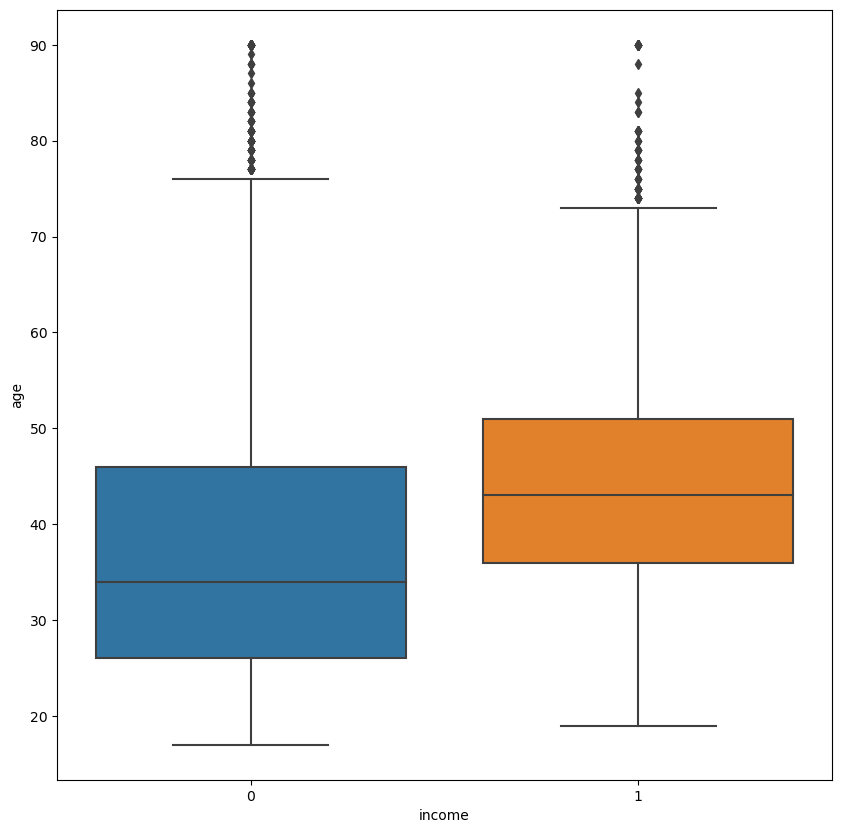

In [63]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=data)
plt.show()

In [64]:
data[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,1,44.006067
0,0,36.749427


The mean "age" for Income group(<=50k) is 36.8 years.
And for Income group(>50k) is 44.2 years


# ii. Description about boxplot

The above bivariate boxplot shows :
    
• Outliers present in both the income group(<=50k and >50k) wrt "age" attribute.

• Income group(<=50k) has lower median "age"(34 year) than the Income 
group(>50k) which has median "age"(42 year).

• Interquartile range(IQR) :
    
    
    
    – For Income group(<=50k) , IQR is between [25,46] (long range) Middle 50% of the Age is spread over longer range for the income group who earn <=50k.

– For Income group(>50k) , IQR is between [38,50] (shorter range)


# iii. Hypothesis test (to test the relationship between income & Age )


# Two sampled T-test :-
The Independent Samples t Test or 2-sample t-test compares the 
means of two independent groups in order to determine whether there is statistical 
evidence that the associated population means are significantly different. The Independent 
Samples t Test is a parametric test. This test is also known as: Independent t Test.

    Example : is there any association between age and income

Determine a null and alternative hypothesis.


In general, the null hypothesis will state that the two populations 
being tested have no statistically significant difference.
The alternate hypothesis will state that there is one present.


In this example we can say that:
    
• Null Hypothesis :- there is no difference in Mean age of income group >50k and 
income group <=50k.

• Alternate Hypothesis :- there is difference in Mean age of income group >50k and 
income group <=50k.

In [65]:
import random
data=data[(np.abs(stats.zscore(data['age']))<3)]

In [66]:
income_1=data[data['income']==1]['age']
income_0=data[data['income']==0]['age']

In [67]:
income_0=income_0.values.tolist()
income_0=random.sample(income_0,100)
income_1=income_1.values.tolist()
income_1=random.sample(income_1,100)

In [68]:
from scipy.stats import ttest_ind 
ttest,pval=ttest_ind(income_1,income_0,equal_var=False)
print('ttest',ttest)
print('pval',pval)

if pval<0.05:
    print('we reject the  null hypothesis  ')
else:
    print('we accept the null hypithesis')

ttest 5.620939497932429
pval 6.632065199889447e-08
we reject the  null hypothesis  


# iv. Final conclusion


Using statistical analysis,

We can conclude that there is a significant difference in the mean 
ages of income group >50k and income group <=50k.
It means that age has some contribution to the distinguish income 
groups.


# 5.2.2 Hours per week

# i. Boxplot (Relationship with income)

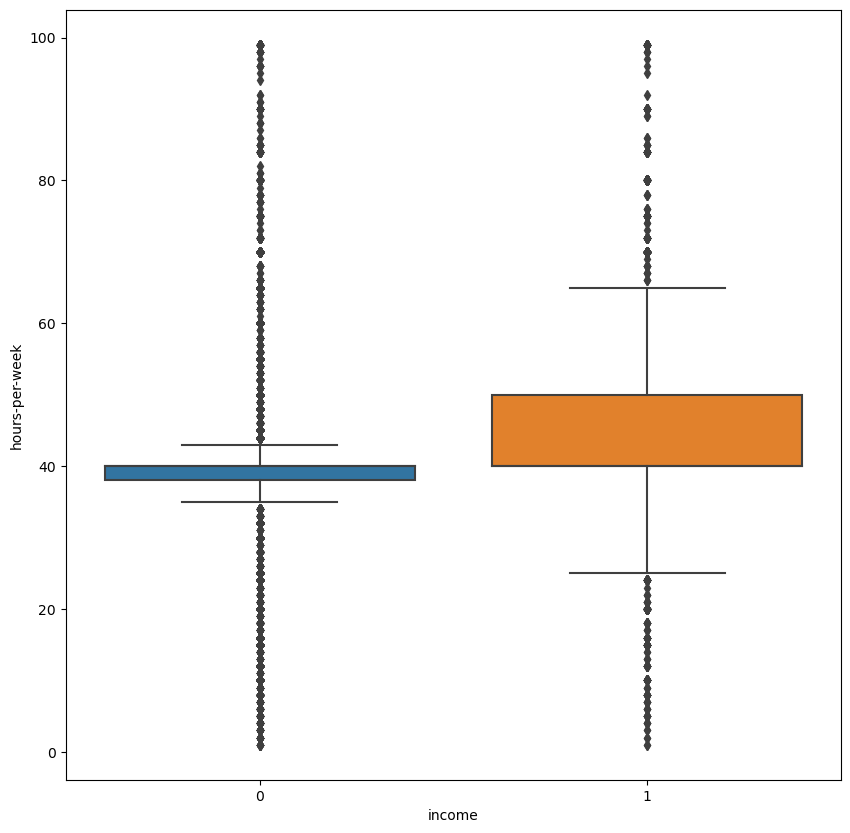

In [69]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(x='income',y='hours-per-week',data=data)
plt.show()

# ii. Description about boxplot

Bivariate Analysis with the boxplot shows that:
    
• The median "hours-per-week" for Income group who earns >50k is greater than the 
Income group who earns <=50k.

Interpretation

– Income group who earns >50k has spend ~44 "hours-per-week".(long hours)
– Income group who earns <=50k has spend ~37 "hours-per-week".

• The boxplot for Income group

who earns <=50k has small range for minimum (q1-
1.5* IQR) and maximum (q3+ 1.5* IQR) i.e.~[28,48].

But the boxplot for Income 

group who earns >50k has large range for minimum (q1-1.5* IQR) and maximum 
(q3+ 1.5* IQR) i.e.~[23,68].


Interpretation

– Income group who earns >50k have flexible working hours
• More Outliers present in the Income group who earns <=50k.

# iii. Hypothesis test (to test the relationship between income & hours-per-week )


In this example we can say that:
    
Null Hypothesis :-
    
    there is no difference in Mean of income group >50k
and income group <=50k.

Alternate Hypothesis :- 
    
    there is difference in Mean of income group 
>50k and income group <=50k.


In [70]:
import random

In [71]:
data=data[(np.abs(stats.zscore(data['hours-per-week']))<3)]

In [72]:
income_1=data[data['income']==1]['hours-per-week']
income_0=data[data['income']==0]['hours-per-week']

In [73]:
income_0=income_0.values.tolist()
income_0=random.sample(income_0,100)
income_1=income_1.values.tolist()
income_1=random.sample(income_1,100)

In [74]:
ttest,pval=ttest_ind(income_1,income_0,equal_var=False)
print('ttest',ttest)
print('pval',format(pval,'.70f'))

if pval<0.05:
    print('we do reject the null hypothesis')
else:
    print('we do accept the  null hypothesis')

ttest 3.423270980174703
pval 0.0007628806669931886136337695347720000427216291427612304687500000000000
we do reject the null hypothesis


iv. Final conclusion

Using statistical analysis with the help of two sample t-test,


We can conclude that there is difference in Mean of income group >50k 
and income group <=50k.

It means that hours-per-week has some contribution to the distinguish 
income groups.


# 5.2.3 fnlwgt
i. Boxplot (Relationship with income)


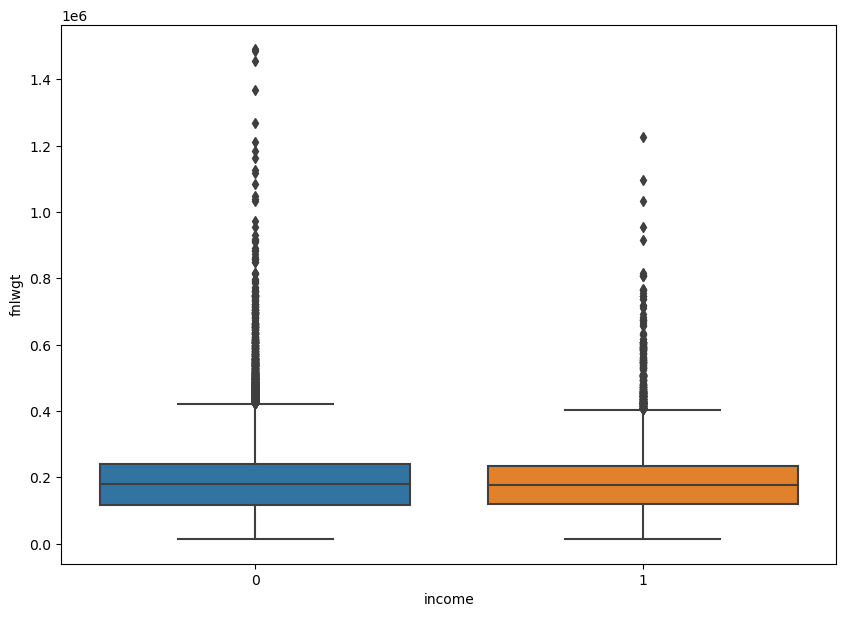

In [75]:
plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="fnlwgt", data=data)
plt.show()

ii. Description about boxplot


• As evident from the above plot, both income group has nearly same IQR and median 
is centered on 0.

• Outliers are present in both the income groups.

• It seems that the boxplot for final weight w.r.t income groups is similar except the 
number of outliers in income group who earns <=50k is more.

iii. Hypothesis test (to test the relationship between income & fnlwgt)

Null Hypothesis :- 
    
    there is no difference in Mean of income group >50k and income group <=50k.

Alternate Hypothesis :- 
    
    there is difference in Mean of income group >50k and income group <=50k.


# 5.2.4 capital-gain
i. Boxplot (Relationship with income)

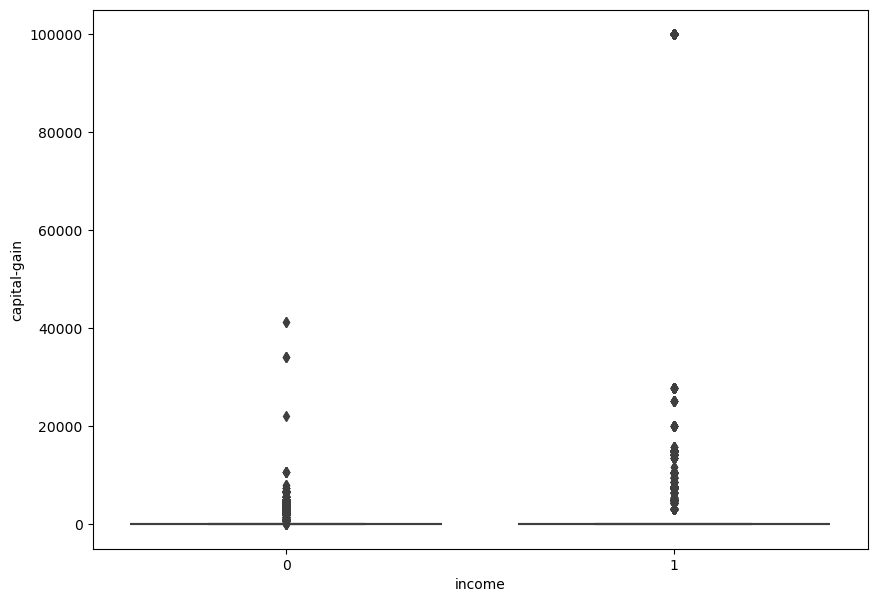

In [76]:
plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="capital-gain", data=data)
plt.show()


### ii. Description about boxplot
This boxplot tells us that:
Most of the capital gains value is accumulated at 0 for both the 
income group .


# iii. Hypothesis test (to test the relationship between income & capital gain )



• Null Hypothesis :- there is no difference in Mean of income group >50k and income 
group <=50k.

• Alternate Hypothesis :- there is difference in Mean of income group >50k and 
income group <=50k.


In [77]:
data = data[(np.abs(stats.zscore(data["capital-gain"])) < 3)] 
income_1 = data[data['income']==1]["capital-gain"]
income_0 = data[data['income']==0]["capital-gain"]
import random

In [78]:
income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)
if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")
print('• Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.')

ttest 3.90486594132503
p-value 0.0001720125906654207
we reject null hypothesis
• Null Hypothesis :- there is no difference in Mean of income group >50k and income group <=50k.


iv. Final conclusion

Using statistical analysis with the help of two sample t-test,

We can conclude that there is no difference in Mean of income group >50k and income group <=50k.

It means that final weight has no contribution to the distinguish 
income group.


# 5.2.5. capital-loss
i. Boxplot (Relationship with income)

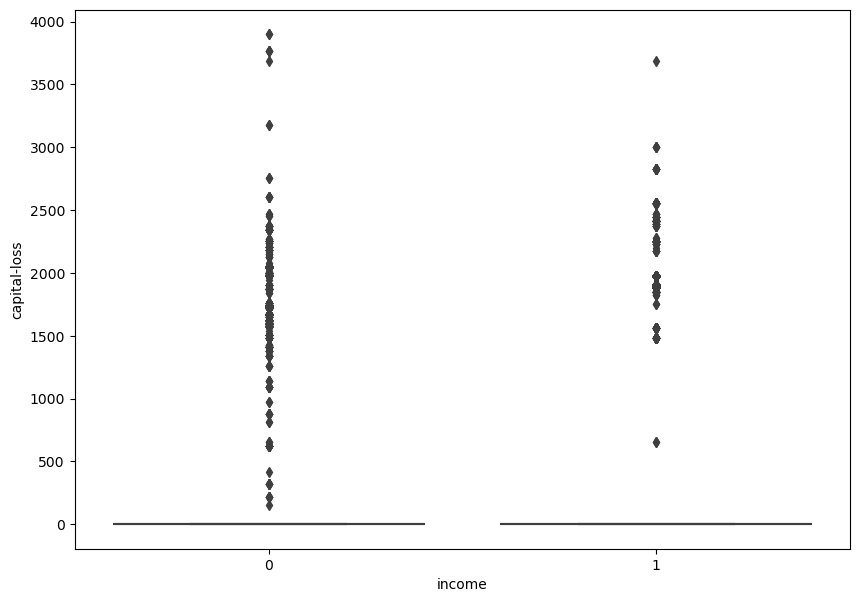

In [79]:
plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="capital-loss", data=data)
plt.show()


# ii. Description about boxplot

This boxplot is similar to the capital gain boxplot where most of the values are 
concentrated on 0.


# iii. Hypothesis test (to test the relationship between income & capital loss )


Null Hypothesis :- there is no difference in Mean of income group >50k
and income group <=50k.

Alternate Hypothesis :- there is difference in Mean of income group >50k and income group <=50k.

In [80]:
income_1 = data[data['income']==1]["capital-loss"]
income_0 = data[data['income']==0]["capital-loss"]


In [81]:
income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)
if pval <0.05:
    print("we reject null hypothesis")
else:
 print("we accept null hypothesis")

ttest 1.5757903492871161
p-value 0.11697604786649299
we accept null hypothesis


In [82]:
data = data[(np.abs(stats.zscore(data["fnlwgt"])) < 3)] 
income_1 = data[data['income']==1]["fnlwgt"]
income_0 = data[data['income']==0]["fnlwgt"]


In [83]:
income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)
if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

ttest -0.617164818042982
p-value 0.5378717099531836
we accept null hypothesis


# iv. Final conclusion

Using statistical analysis with the help of two sample t-test,

We can conclude that there is no difference in Mean capital loss of 
income group >50k and income group <=50k.

It means that capital-loss is unable to seperate the income groups.

# 5.2.6 Workclass
i. Plot (Relationship with income)


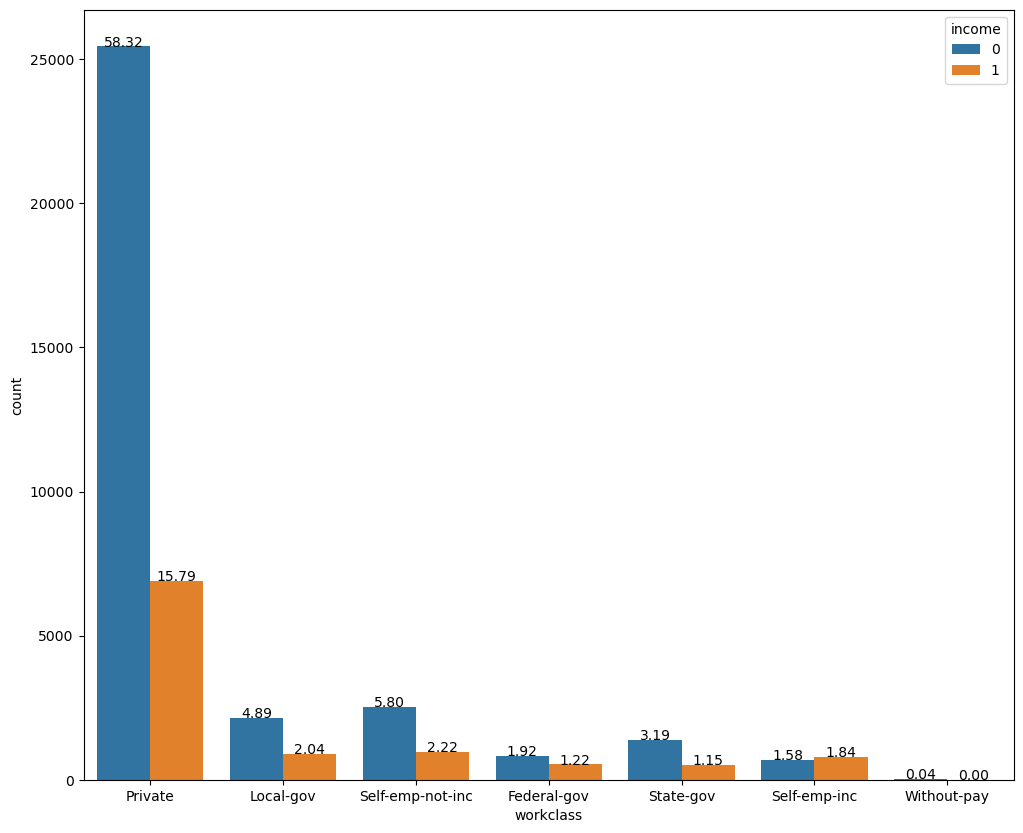

In [84]:
plt.figure(figsize=(12,10))
total = float(len(data["income"]) )

ax = sns.countplot(x="workclass", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
     height + 3,
 '{:1.2f}'.format((height/total)*100),
 ha="center") 
plt.show()


# ii. Description about plot

This plot shows that:
    
• In private workclass most of the people(59.48%) earn <=50k(belong
to income group 0).

• self-emp-inc workclass is only where more people earn >50k(belong
to income group 1).

• In Federal-gov workclass nearly more than half of the people earn >50k.


# iii. Hypothesis test (to test the relationship between income & workclass)

Chi-square goodness of fit


A chi-square goodness of fit test allows us to test whether the observed proportions for a 
categorical variable differ from hypothesized proportions. The chi-square statistical test is 
used to determine whether there’s a significant difference between an expected 
distribution and an actual distribution.


• For example, let’s suppose that we believe that the general population consists of 
70% private workclass, 10% local-gov, 10% self-emp-not-inc and 10% self-emp-inc.
We want to test whether the observed proportions from our sample differ 
significantly from these hypothesized proportions.



# contingency table

In [85]:
c_t = pd.crosstab(data['workclass'].sample(frac=0.002, replace=True, 
random_state=1),data['income'].sample(frac=0.002, replace=True, 
random_state=1),margins = False) 
c_t

income,0,1
workclass,,
Federal-gov,2,2
Local-gov,4,1
Private,55,16
Self-emp-inc,1,1
Self-emp-not-inc,4,0
State-gov,1,0


The table was called a contingency table, by Karl Pearson, because the intent is to help 
determine whether one variable is contingent upon or depends upon the other variable. 
For example, does an interest in workclass depend on income, or are they independent?


This is challenging to determine from the table alone; instead, we can use a statistical 
method called the Pearson’s Chi-Squared test.


We can interpret the test statistic in the context of the chi-squared distribution with the 
requisite number of degress of freedom as follows:

    
If Statistic >= Critical Value: significant result, reject null 
hypothesis (H0), dependent.


If Statistic < Critical Value: not significant result, fail to reject 
null hypothesis (H0), independent.

Here, In this example

• **H0(Null Hypothesis)** : There is no relationship between 
workclass and income.

• **H1(Alternate Hypothesis)** : There is a relationship between 
workclass and income.

In [86]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [87]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)
# interpret test-statistic
prob = 0.95

critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, 
stat))
if abs(stat) >= critical:
     print('Dependent (reject H0)')
else:
     print('Independent (fail to reject H0)')

dof=5
p_value 0.5495940812100252
[[ 3.08045977  0.91954023]
 [ 3.85057471  1.14942529]
 [54.67816092 16.32183908]
 [ 1.54022989  0.45977011]
 [ 3.08045977  0.91954023]
 [ 0.77011494  0.22988506]]
probability=0.950, critical=11.070, stat=3.999
Independent (fail to reject H0)


# iv. Final conclusion


With the help of Chi-Squared test,


As we have accept the H0, that there is no relationship between these 
two categorical variable.

We can conclude that is no dependency of "workclass" attribute on the 
target variable "income

# 5.2.7 Education


# i. Plot (Relationship with income)


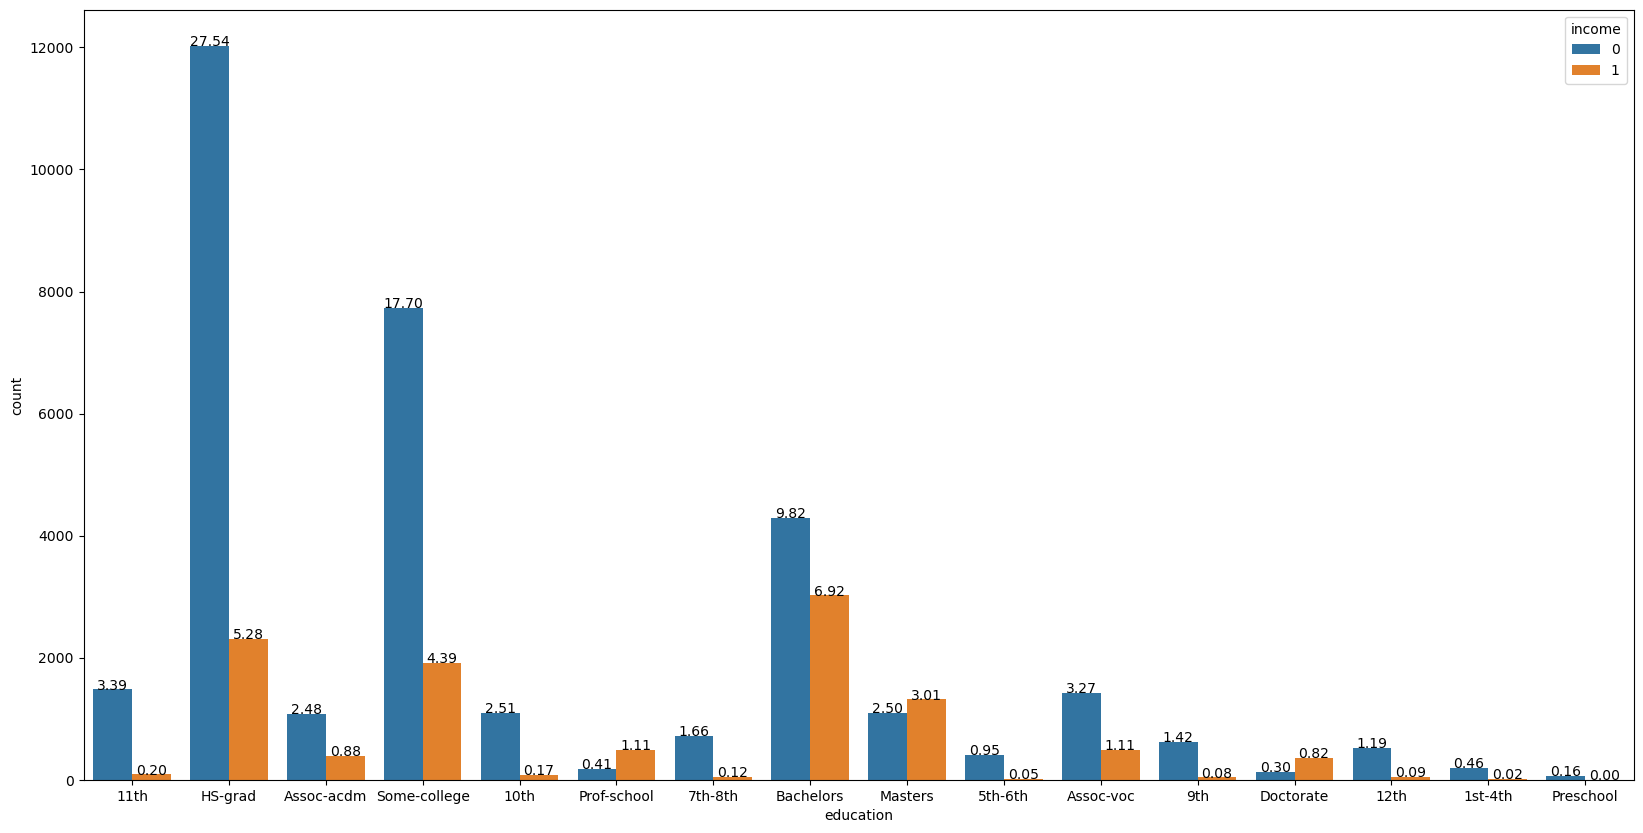

In [88]:
plt.figure(figsize=(20,10))
total = float(len(data["income"]) )
ax = sns.countplot(x="education", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
 height + 3,
 '{:1.2f}'.format((height/total)*100),
 ha="center") 
plt.show()


# ii. Description about plot

This plot shows that:
    
• Despite the fact that most of the categories fall under the HS-grade but the interesting thing is only 5.12% of all people belong
to the income group 1(i.e. earns more than 50k), surprisely less 
than the categories fall under the Bachelors which is 6.78%.

• There only few categories in "education" attribute whose 
percentage to fall under income group 1 is greater than the 
falling under income group 0.

• These are prof-school, masters and doctorate.

• We can also infer that higher eduction may provide better 
earnings.


# iii. Hypothesis test (to test the relationship between income & education)

Here, In this example

H0(Null Hypothesis) : There is no relationship between education and 
income.

H1(Alternate Hypothesis) : There is a relationship between education 
and income

# contingency table


In [89]:
c_t = pd.crosstab(data['education'].sample(frac=0.002, replace=True, 
random_state=1),data['income'].sample(frac=0.002, replace=True, 
random_state=1),margins = False) 
c_t

income,0,1
education,,
10th,6,0
11th,4,0
12th,1,0
5th-6th,2,0
9th,1,0
Assoc-acdm,2,2
Assoc-voc,3,0
Bachelors,8,7
Doctorate,1,0


In [90]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)
# interpret test-statistic
prob = 0.95

critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, 
stat))
if abs(stat) >= critical:
     print('Dependent (reject H0)')
else:
     print('Independent (fail to reject H0)')

dof=12
p_value 0.1904545827549965
[[ 4.62068966  1.37931034]
 [ 3.08045977  0.91954023]
 [ 0.77011494  0.22988506]
 [ 1.54022989  0.45977011]
 [ 0.77011494  0.22988506]
 [ 3.08045977  0.91954023]
 [ 2.31034483  0.68965517]
 [11.55172414  3.44827586]
 [ 0.77011494  0.22988506]
 [23.10344828  6.89655172]
 [ 2.31034483  0.68965517]
 [ 0.77011494  0.22988506]
 [12.32183908  3.67816092]]
probability=0.950, critical=21.026, stat=16.017
Independent (fail to reject H0)


# iv. Final conclusion
With the help of Chi-Squared test,


• As we have rejected the H0, that there is no relationship between
these two categorical variable.

• We can conclude that is some dependency of "education" attribute 
on the target variable "income"

# 5.2.8 Marital-status

i. Plot (Relationship with income)


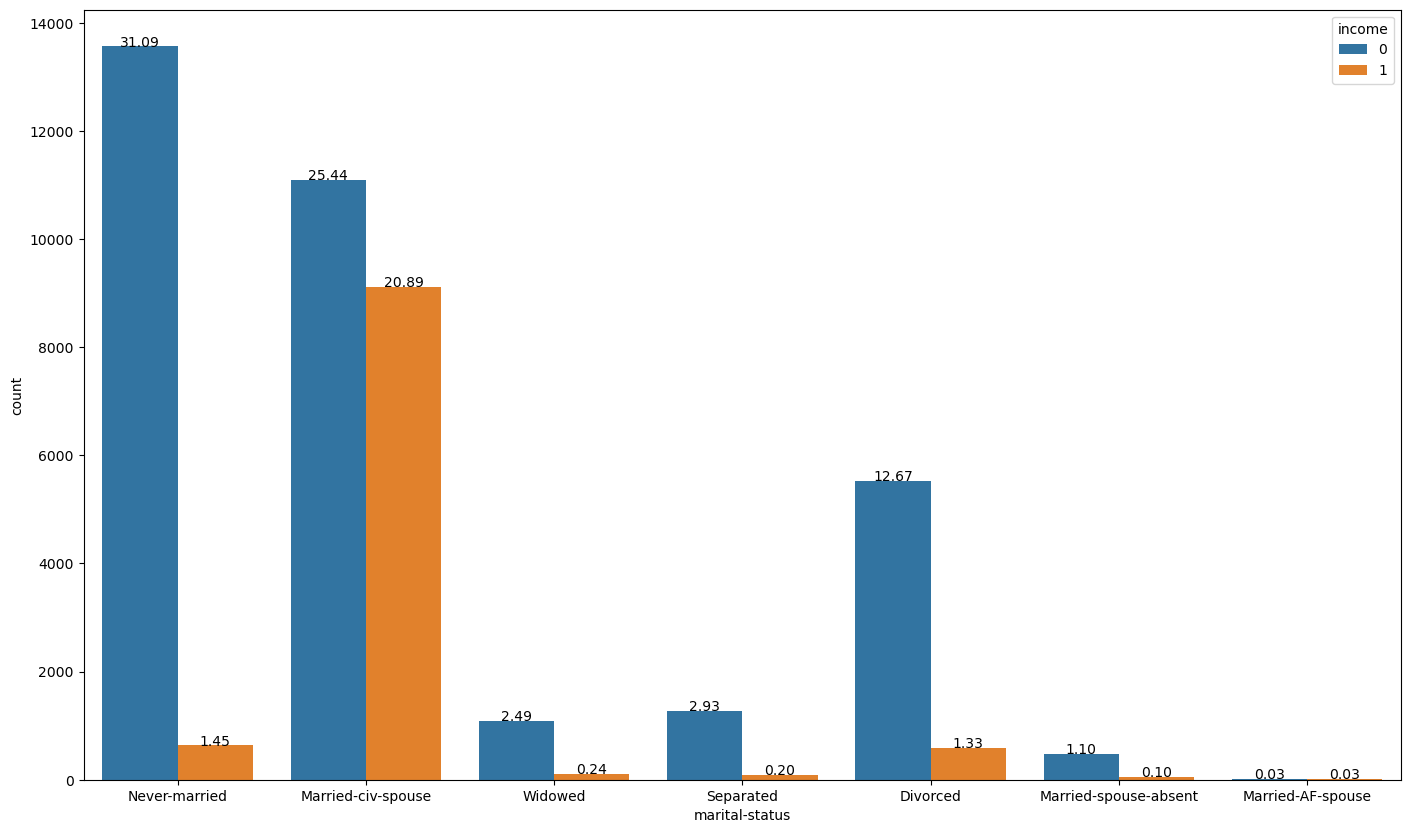

In [91]:
plt.figure(figsize=(17,10))
total = float(len(data) )
ax = sns.countplot(x="marital-status", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
 height + 3,
 '{:1.2f}'.format((height/total)*100),
 ha="center") 
plt.show()

# ii. Description about plot
This countplot explain following things:
    
• Married-civ-spouse has the highest percentage(20.44%) of falling 
under the income group 1(>50k).


• Despite the fact that we have 16117 observation in the marital-status attribute(which is sec. highest) but only 1.5% of the 
people of "Never-married" earn more than 50k.

• Married-spouse-absent and Married-AF-spouse has negligible 
contribution to the fall under income group 1.



# iii. Hypothesis test (to test the relationship between income & marital-status)

Here, In this example

• **H0(Null Hypothesis)** : There is no relationship between 
marital-status and income.

• **H1(Alternate Hypothesis)** : There is a relationship between 
marital-status and income.

# contingency table

In [92]:
c_t = pd.crosstab(data['marital-status'].sample(frac=0.002, 
replace=True, random_state=1),data['income'].sample(frac=0.002, 
replace=True, random_state=1),margins = False) 
c_t

income,0,1
marital-status,,
Divorced,16,1
Married-civ-spouse,15,16
Never-married,31,3
Widowed,5,0


In [93]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, 
stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=3
p_value 5.1255167409824e-05
[[13.09195402  3.90804598]
 [23.87356322  7.12643678]
 [26.18390805  7.81609195]
 [ 3.85057471  1.14942529]]
probability=0.950, critical=7.815, stat=22.503
Dependent (reject H0)


# v. Final conclusion

With the help of Chi-Squared test,

• As we have rejected the H0, that there is no relationship between these two 
categorical variable.

• We can conclude that is some dependency of "marital-status" attribute on the target 
variable "income"


# 5.2.9 Occupation
i. Plot (Relationship with income)


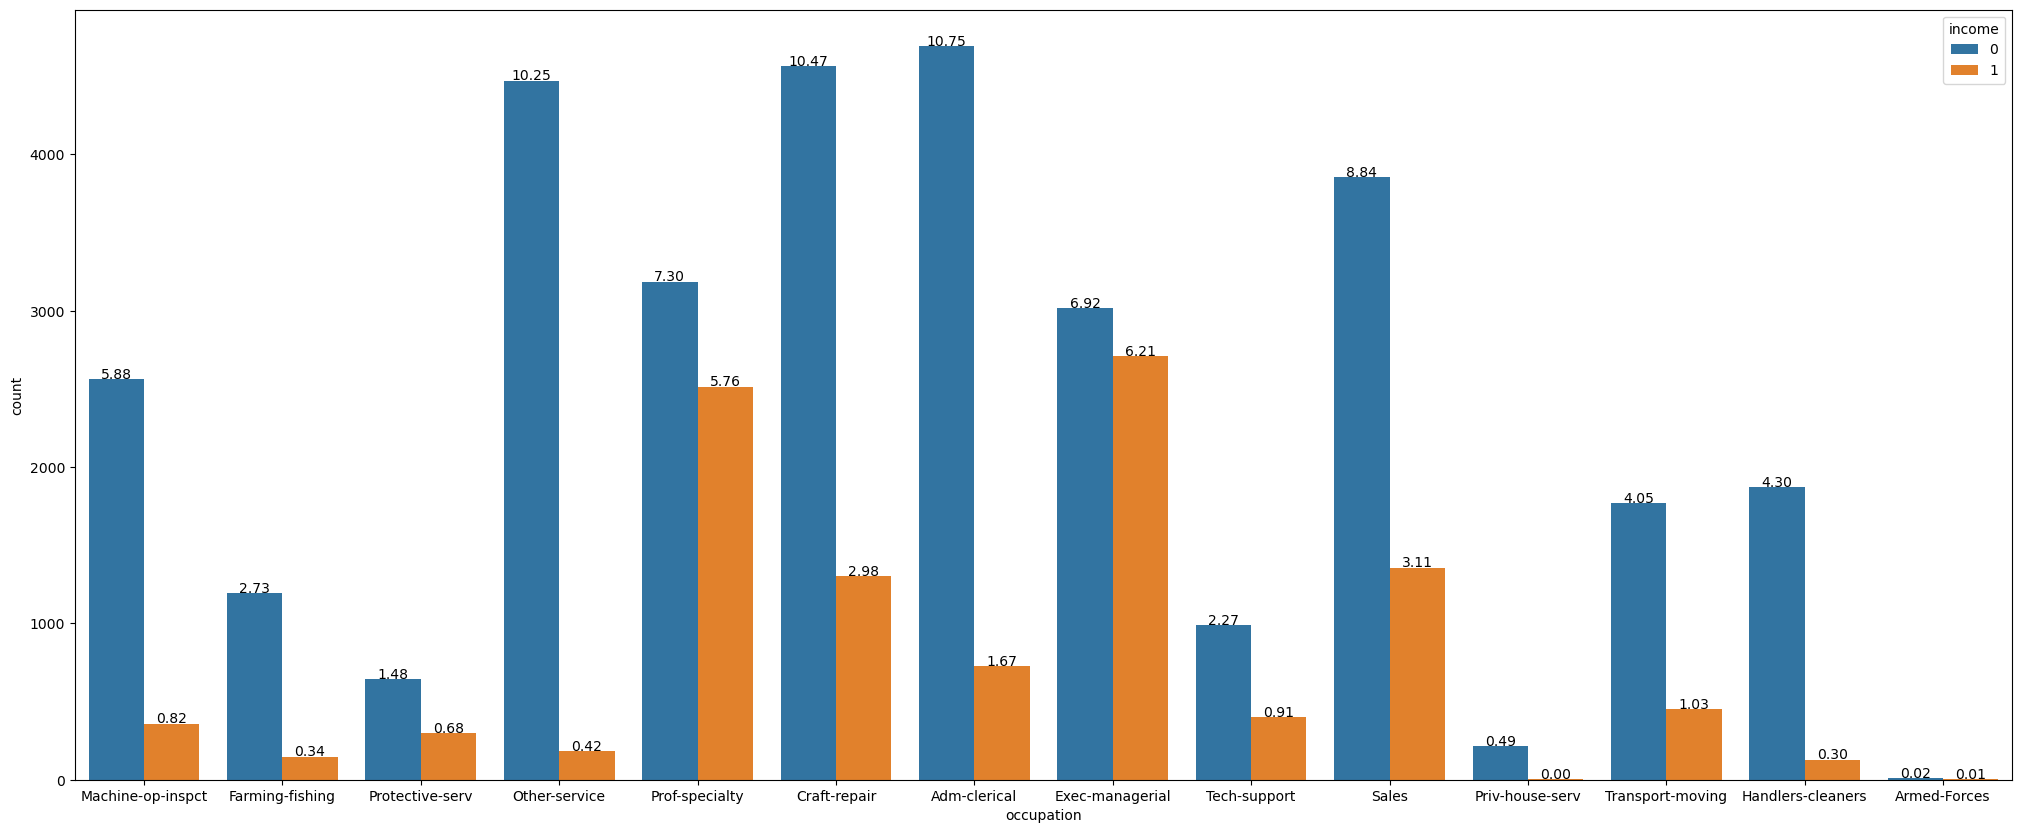

In [94]:
plt.figure(figsize=(25,10))
total = float(len(data) )
ax = sns.countplot(x="occupation", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
 height + 3,
 '{:1.2f}'.format((height/total)*100),
 ha="center") 
plt.show()

# ii. Description about plot
This countplot explain following things:

• Prof-specialty has maximum percentage that fall in both income 
group 0 and 1 in whole categories with 12.15% and 6.24% 
respectively.

• There is an interesting thing to look in this plot which is no 
occupation has greater percentage of falling in income group 1 
than the income group 0. i.e. in every occupation, people who 
earn less than 50k is greater than people who earn >50k.


# iii. Hypothesis test (to test the relationship between income & occupation)

Here, In this example

H0(Null Hypothesis) : There is no relationship between occupation and 
income.

H1(Alternate Hypothesis) : There is a relationship between occupation 
and income.


In [95]:
c_t = pd.crosstab(data['occupation'].sample(frac=0.002, 
replace=True, random_state=1),data['income'].sample(frac=0.002, 
replace=True, random_state=1),margins = False) 
c_t

income,0,1
occupation,,
Adm-clerical,10,3
Craft-repair,6,4
Exec-managerial,6,0
Farming-fishing,2,0
Handlers-cleaners,4,0
Machine-op-inspct,6,0
Other-service,9,1
Prof-specialty,3,5
Protective-serv,1,2


In [96]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, 
stat))
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=11
[[10.01149425  2.98850575]
 [ 7.70114943  2.29885057]
 [ 4.62068966  1.37931034]
 [ 1.54022989  0.45977011]
 [ 3.08045977  0.91954023]
 [ 4.62068966  1.37931034]
 [ 7.70114943  2.29885057]
 [ 6.16091954  1.83908046]
 [ 2.31034483  0.68965517]
 [12.32183908  3.67816092]
 [ 3.08045977  0.91954023]
 [ 3.85057471  1.14942529]]
probability=0.950, critical=19.675, stat=18.445
Independent (fail to reject H0)


# iv. Final conclusion

With the help of Chi-Squared test,

• As we have rejected the H0, that there is no relationship between
these two categorical variable.

• We can conclude that is some dependency of "occupation" attribute
on the target variable "income"

# 5.2.10 Relationship
i. Plot (Relationship with income)

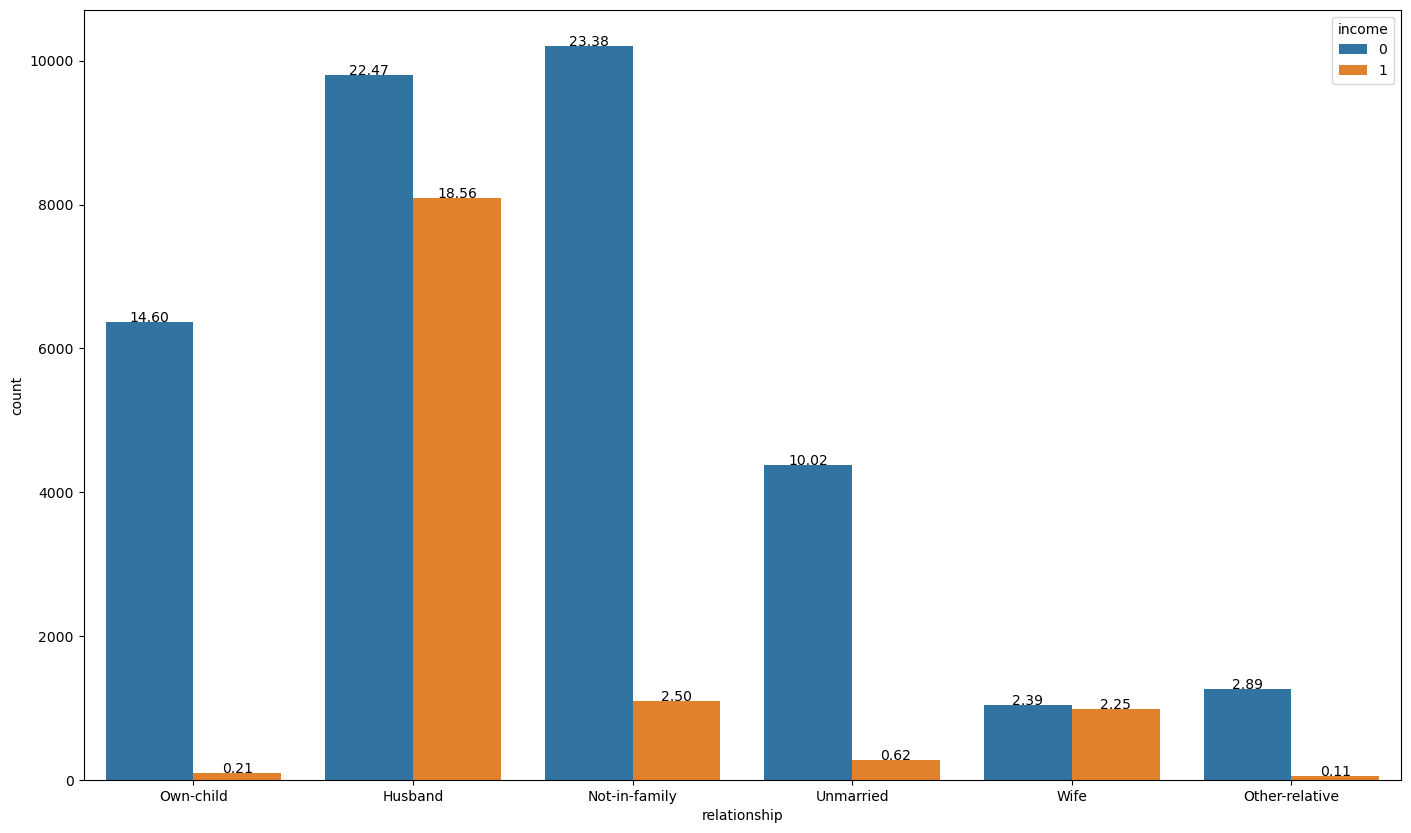

In [97]:
plt.figure(figsize=(17,10))
total = float(len(data))
ax = sns.countplot(x="relationship", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
 height + 3,
 '{:1.2f}'.format((height/total)*100),
 ha="center") 
plt.show()


# ii. Description about plot

This countplot explain following things:

• husbands has the highest percentage(18.11%) of earning more than 
50k in all the other categories.

• One thing to notice is that "not-in-family" has highest 
percentage(23.15%) to earn less than 50k but they had nearly same
percentage(2.61%) as of the "wife"(2.24%) category. This 
comparsion is done due to fact that "wife" category has only 
2.53% to fall under the income group 0.

• "own-child" and "other-relative" has the minimum percentage to 
fall under the income group 1 i.e. 0.23% and 0.11% respectively.

• There is huge difference between the percentage of fall either 
groups except for "husband" and "wife".


# iii. Hypothesis test (to test the relationship between income & relationship)

Here, In this example

• **H0(Null Hypothesis)** : Both the relationship and income 
variables are independent to each other.

• **H1(Alternate Hypothesis)** : There is a dependent to each 
other.

# contingency table

In [98]:
c_t = pd.crosstab(data['relationship'].sample(frac=0.002, 
replace=True, random_state=1),data['income'].sample(frac=0.002, 
replace=True, random_state=1),margins = False) 
c_t

income,0,1
relationship,,
Husband,10,14
Not-in-family,28,3
Other-relative,1,0
Own-child,15,0
Unmarried,9,1
Wife,4,2


In [99]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, 
stat))
if abs(stat) >= critical:
     print('Dependent (reject H0)')
else:
     print('Independent (fail to reject H0)')

dof=5
[[18.48275862  5.51724138]
 [23.87356322  7.12643678]
 [ 0.77011494  0.22988506]
 [11.55172414  3.44827586]
 [ 7.70114943  2.29885057]
 [ 4.62068966  1.37931034]]
probability=0.950, critical=11.070, stat=26.130
Dependent (reject H0)


# v. Final conclusion

With the help of Chi-Squared test,

• As we have rejected the H0, that there are independent to each 
other..

• We can conclude that is some dependency of "relationship" 
attribute on the target variable "income"


# 5.2.11 Race
i. Plot (Relationship with income)

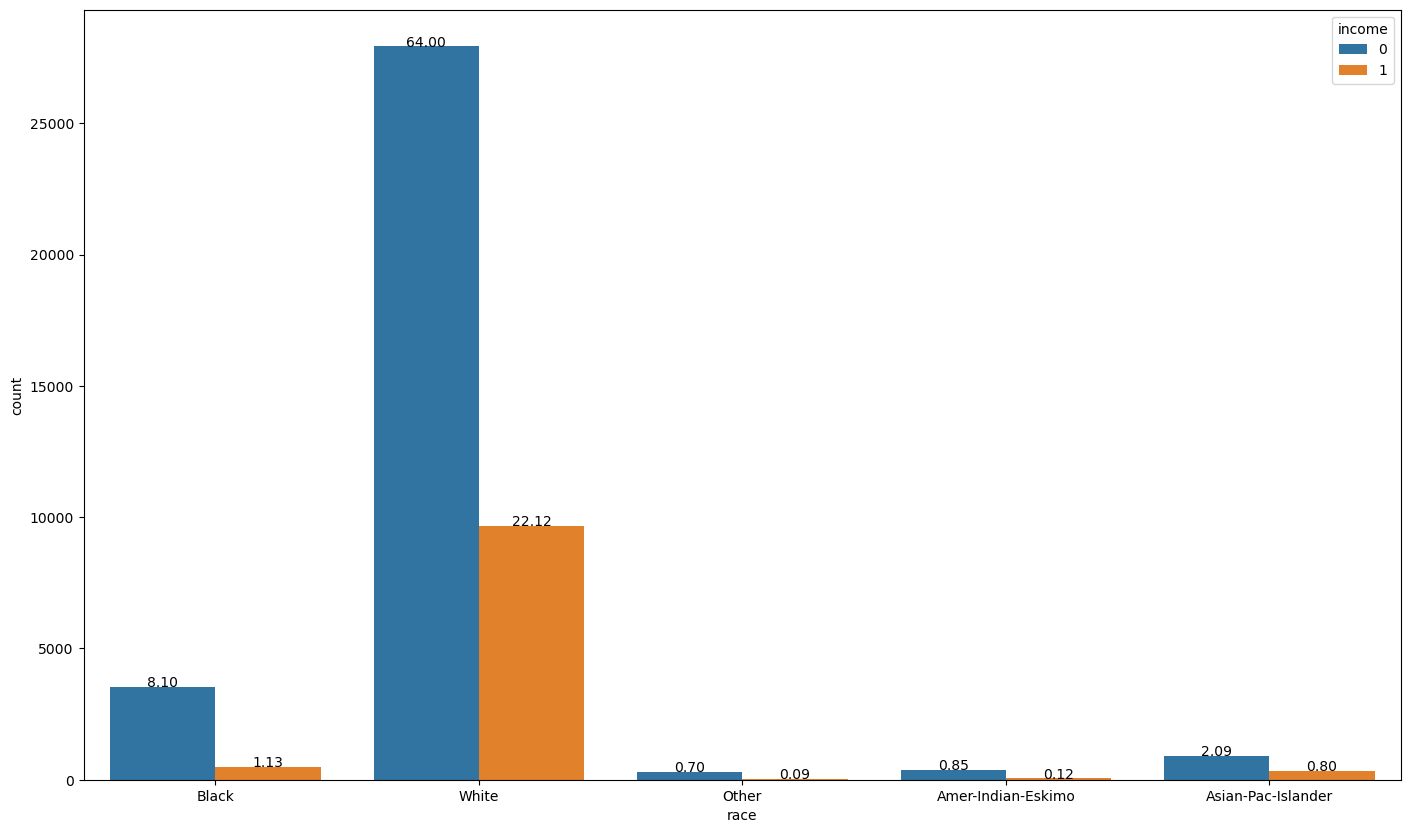

In [100]:
plt.figure(figsize=(17,10))
total = float(len(data) )
ax = sns.countplot(x="race", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
 height + 3,
 '{:1.2f}'.format((height/total)*100),
 ha="center") 
plt.show()

# ii. Description about plot

This countplot explain following things:

• The relationship of "white" race with "income" can easily guess 
based on previous summary statistics.

• There is huge difference between the percentage of fall either 
groups for each "race" except for the "other"(.63%) and "amerindian-eskimo"(.74%) but this could be due the lesser number of 
observations for those categories.

# iii. Hypothesis test (to test the relationship between income & race)

Here, In this example

• **H0(Null Hypothesis)** : There is no relationship between race 
and income.

• **H1(Alternate Hypothesis)** : There is a relationship between 
race and income.

In [101]:
# contingency table
c_t = pd.crosstab(data['race'].sample(frac=0.002, replace=True, 
random_state=1),data['income'].sample(frac=0.002, replace=True, 
random_state=1),margins = False) 
c_t

income,0,1
race,,
Asian-Pac-Islander,2,0
Black,6,5
Other,1,0
White,58,15


In [102]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, 
stat))
if abs(stat) >= critical:
     print('Dependent (reject H0)')
else:
     print('Independent (fail to reject H0)')
    

dof=3
p_value 0.2330502277478633
[[ 1.54022989  0.45977011]
 [ 8.47126437  2.52873563]
 [ 0.77011494  0.22988506]
 [56.2183908  16.7816092 ]]
probability=0.950, critical=7.815, stat=4.277
Independent (fail to reject H0)


# iv. Final conclusion

With the help of Chi-Squared test,

• As we have accept the H0, that there is no relationship between 
these two categorical variable.

• We can conclude that is no dependency of "race" attribute on the 
target variable "income"

# 5.2.12 Gender
i. Plot (Relationship with income

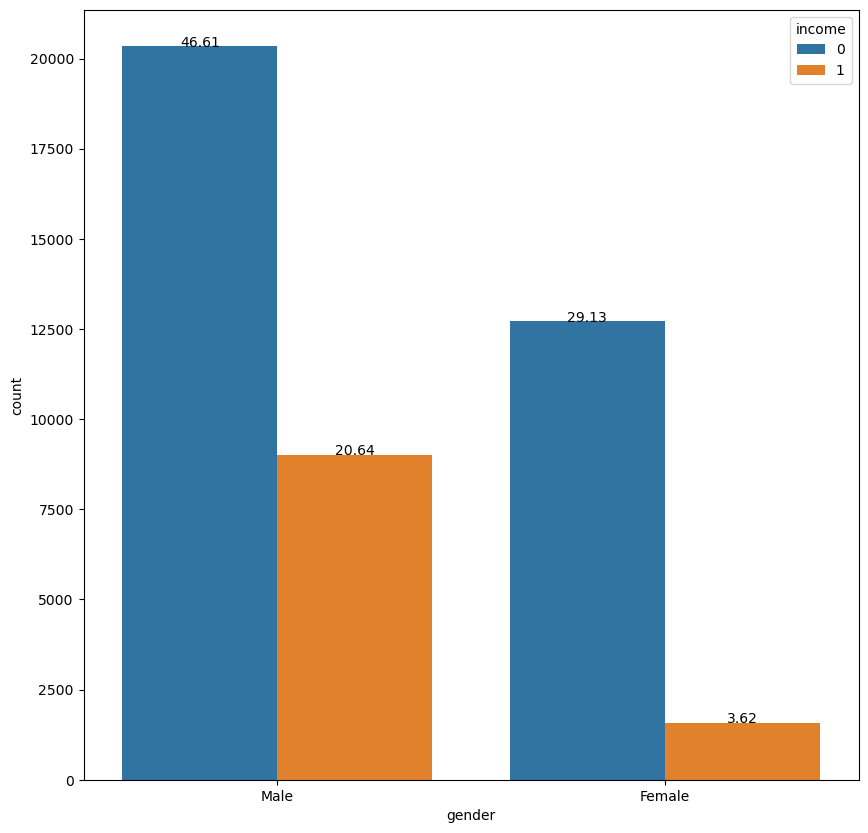

In [103]:
plt.figure(figsize=(10,10))
total = float(len(data) )
ax = sns.countplot(x="gender", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
 height + 3,
 '{:1.2f}'.format((height/total)*100),
 ha="center") 
plt.show()


# ii. Description about plot

This countplot explain following things:

• For "female" earning more than 50k is rare with only 3.62% of all
observations.

• But for male, 20.31% of all people earn more than 50k .

# iii. Hypothesis test (to test the relationship between income & gender)

Here, In this example

• **H0(Null Hypothesis)** : There is no relationship between gender
and income.

• **H1(Alternate Hypothesis**) : There is a relationship between 
gender and income.

In [104]:
# contingency table
c_t = pd.crosstab(data['gender'].sample(frac=0.002, replace=True, 
random_state=1),data['income'].sample(frac=0.002, replace=True, 
random_state=1),margins = False) 
c_t

income,0,1
gender,,
Female,29,5
Male,38,15


In [105]:
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, 
stat))
if abs(stat) >= critical:
     print('Dependent (reject H0)')
else:
     print('Independent (fail to reject H0)')


dof=1
p_value 0.22647186799592073
[[26.18390805  7.81609195]
 [40.81609195 12.18390805]]
probability=0.950, critical=3.841, stat=1.463
Independent (fail to reject H0)


# iv. Final conclusion

With the help of Chi-Squared test,

• As we have rejected the H0, that there is no relationship between
these two categorical variable.

• We can conclude that is some dependency of "gender" attribute on 
the target variable "income"

# 5.2.12 Native-country
i. Hypothesis test (to test the relationship between income & native-country)

# Here, In this example

• **H0(Null Hypothesis)** : There is no relationship between 
native-country and income.

• **H1(Alternate Hypothesis)** : There is a relationship between 
native-country and income.

In [106]:
# contingency table
c_t = pd.crosstab(data['native-country'].sample(frac=0.002, 
replace=True, random_state=1),data['income'].sample(frac=0.002, 
replace=True, random_state=1),margins = False) 
stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print('p_value', p)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, 
stat))
if abs(stat) >= critical:
     print('Dependent (reject H0)')
else:
     print('Independent (fail to reject H0)')


dof=5
p_value 0.40420020254611794
[[ 0.77011494  0.22988506]
 [ 0.77011494  0.22988506]
 [ 1.54022989  0.45977011]
 [ 0.77011494  0.22988506]
 [ 0.77011494  0.22988506]
 [62.37931034 18.62068966]]
probability=0.950, critical=11.070, stat=5.097
Independent (fail to reject H0)


# ii. Final conclusion

With the help of Chi-Squared test,

• As we have accept the H0, that there is no relationship between these two 
categorical variable.

• We can conclude that is no dependency of "native-country" attribute on the target 
variable "income"

# 5.3 Some multivariate relationships
5.3.1 Correlation among the numeric variables.

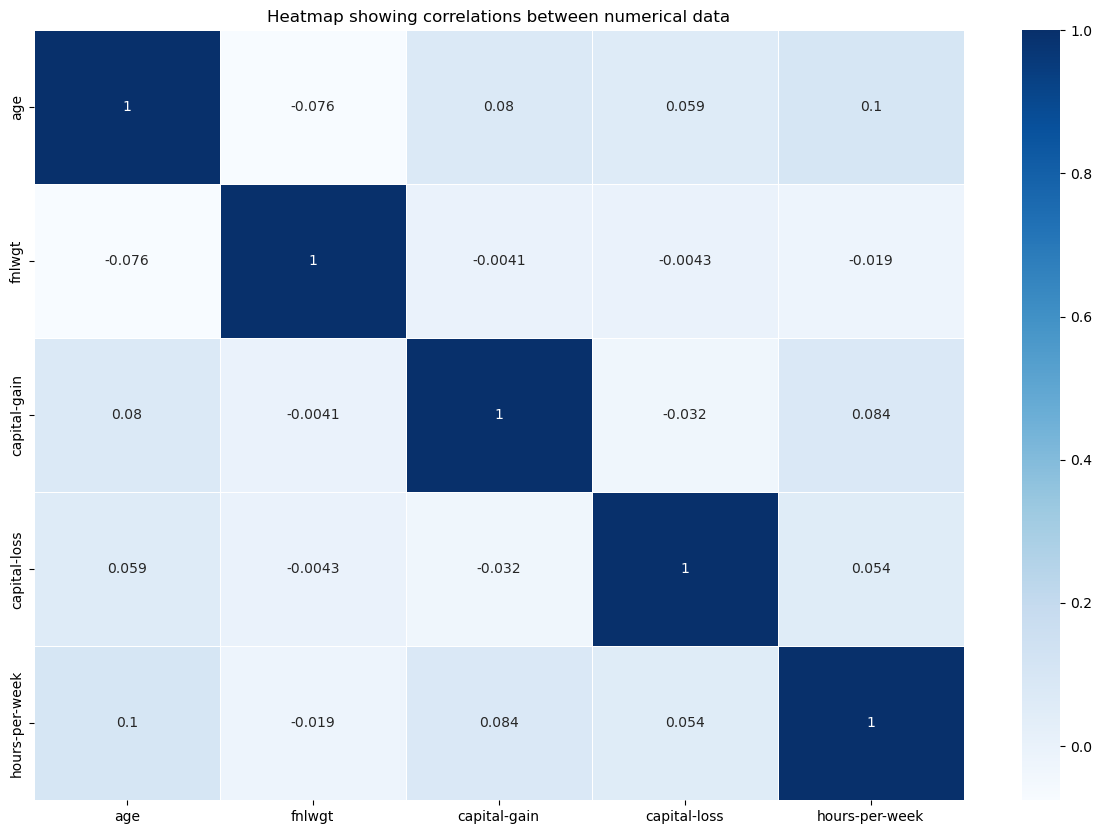

In [107]:
plt.figure(figsize=(15,10)) 
sns.heatmap(data_num.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()


• There is no strong correlation among the numeric attributes.

• There is neither strong positive nor strong negative correlation present in any 
variable .

• The strongest correlation is present between capital gain and hours-per-week with 
Coefficient .082.(which is less than 0.1, it means that very small correlation among 
them).

# 5.3.2 Multivariate Analysis between "income", "hours-per-week", "gender"

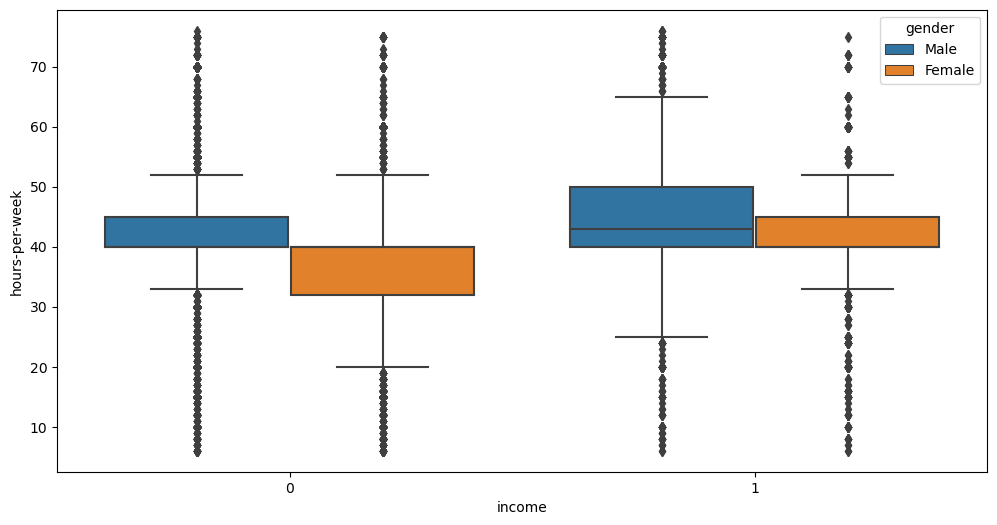

In [108]:
plt.figure(figsize=(12,6))
sns.boxplot(x='income',y ='hours-per-week', hue='gender',data=data)
plt.show()


• The median "hours-per-week" for females is lower than the males in the Income 
group who earns <=50k.

• Boxplot range for Income group who earns <=50k [minimum (q1-1.5* IQR) and 
maximum (q3+ 1.5* IQR)] i.e.

– Male ~[32,52]

– Female ~[17,57]

Interpretation


Females have more flexible working hours per week in the income 
groups who earns <=50k

• Boxplot range for Income group who earns >50k [minimum (q1-1.5* IQR) and 
maximum (q3+ 1.5* IQR)] i.e.

– Male ~[23,63]

– Female ~[30,57]


Interpretation

Males have more flexible working hours per week in the income groups 
who earns <=50k


# ** 5.3.3 Multivariate analysis between "income", "age", "gender"**

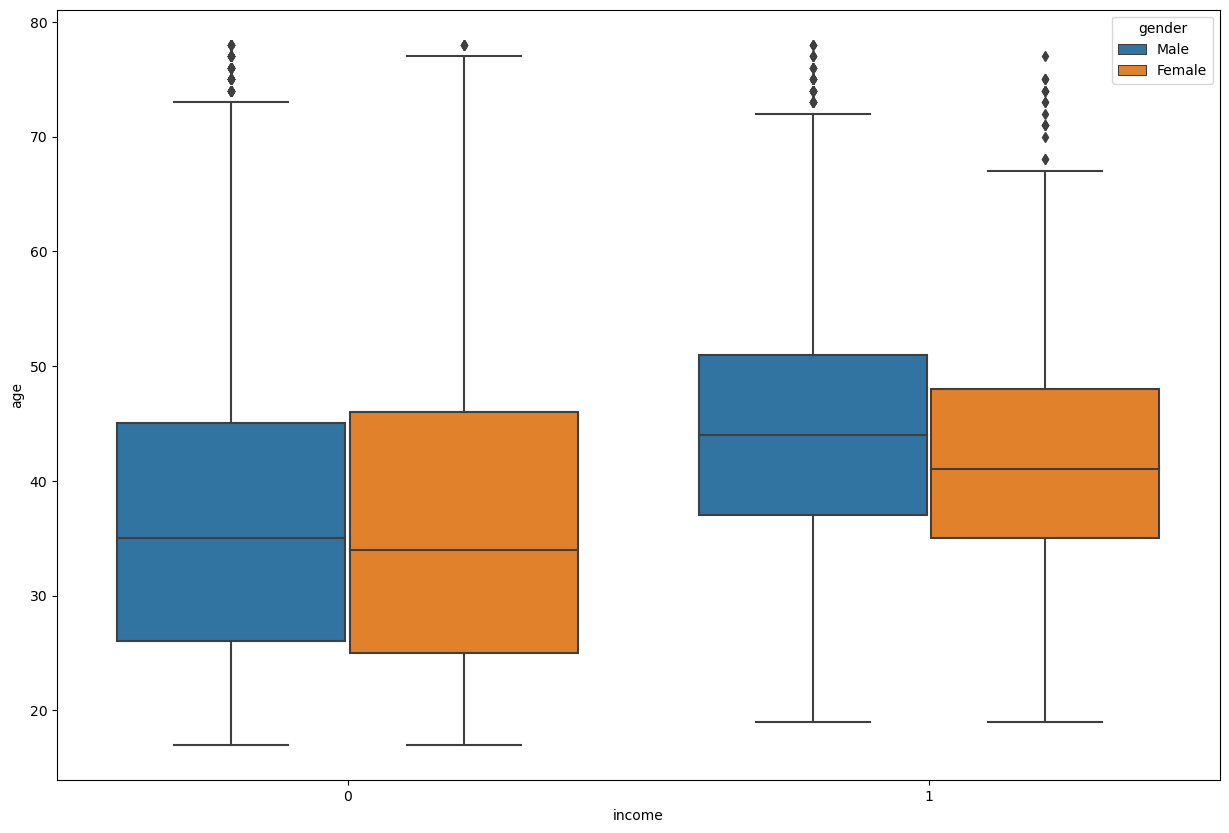

In [109]:
plt.figure(figsize=(15,10))
sns.boxplot(x="income", y="age",hue="gender",data=data)
plt.show()

Multivariate analysis between "income", "age", "gender" shows that:

• Median "age" of Females who earn less than 50k has very minute difference than the
Median "age" of males who earn less than 50k.

• But the Median "age" of Females who earn greater than 50k has age difference of 2-
3years than the Median "age" of males who earn greater than 50k.

# Other Mutlivariate analysis


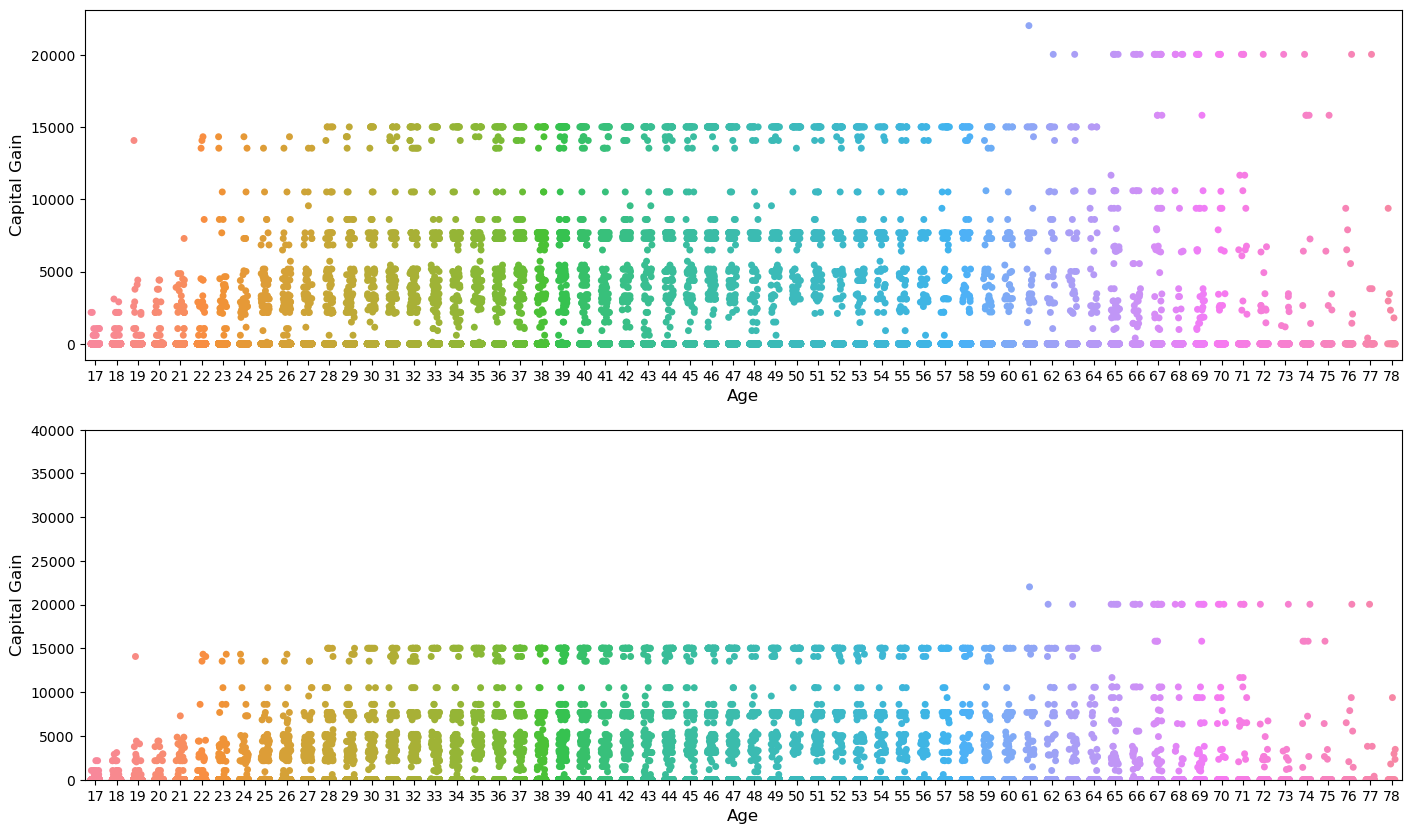

In [110]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('age', 'capital-gain', data = data,
 jitter = 0.2,ax = ax);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
ax = fig.add_subplot(2,1,2)
sns.stripplot('age', 'capital-gain', data = data,
 jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);


Explanation:

• Between age 28 and 64 capital gain is upto 15000 and after that 
it decreases and again increments at age 90

• Age 90 doesn't follow the pattern.

• Capital.gain of 99999 is clearly a outlier .

In [111]:
cols = ['workclass','occupation']
cat_col = data.dtypes[data.dtypes == 'object']
for col in cat_col.index:
        if col in cols:
             print(f"=======================================
          {col}==================
=======")
             print(data[data['age'] == 90][col].value_counts())
        else:
         continue

SyntaxError: EOL while scanning string literal (2728979886.py, line 5)

# 5.3.4 Making new variable(capital_change)
i. Summary statistics

In [ ]:
data["capital_change"] = data["capital-gain"] - data["capital-loss"]
data["capital_change"].describe()


# ii. Distribution

In [ ]:

data["capital_change"].hist(figsize=(8,8))
plt.show()


# iii. Description about summary & Distribution

The summary statistics and distribution of capital_change shows that:

• It is similar summary stats and distribution to the capital gain and capital loss.

• This suggest that , we may replace these two features with one feature called 
capital_change

# v. Hypothesis test (to test the relationship between income & capital change)

• Null Hypothesis :- there is no difference in Mean of income group >50k and income 
group <=50k.

• Alternate Hypothesis :- there is difference in Mean of income group >50k and 
income group <=50k.

In [112]:
income_1 = data[data['income']==1]["capital_change"]
income_0 = data[data['income']==0]["capital_change"]
data = data[(np.abs(stats.zscore(data["age"])) < 3)] 


KeyError: 'capital_change'

In [113]:
income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print("p-value",pval)
if pval <0.05:
     print("we reject null hypothesis")
else:
     print("we accept null hypothesis")

AttributeError: 'list' object has no attribute 'values'

# v. Final conclusion

Using statistical analysis with the help of two sample t-test,

We can conclude that there is difference in Mean of income group >50k 
and income group <=50k.

Hence, we can replace capital-gain and capital-loss with capitalchange.

# 6. Conclusion of Complete EDA

Feature Removal:

1. Education num and education are giving similar information.

2. Using capital-gain and capital loss , we can make new variable 
called capital-change.

Outliers Summary:

1. Capital gain of 99999 doesn't follow any pattern and from graph 
above it clearly distinguishes to be an outlier.

2. Our dataset has people with age 90 and working for 40 hours per 
week in goverment or private sectors which is rare.

Other conclusion:

1. This dataset not balance , i.e. 76% of them are belong to income 
group 1 (who earns more than 50k) and 23.93% fall under the income 
group 0 (who earns less than 50k).

2. Females have more flexible working hours per week in the income 
groups who earns <=50k.

3. Males have more flexible working hours per week in the income 
groups who earns >50k.

4. The Median "age" of Females who earn greater than 50k has age 
difference of 2-3years(lower) than the Median "age" of males who earn 
greater than 50k.

5. Generally people can be seen working for 30 hours to 40 hours per 
week. 

6. Income group who earns >50k have flexible working hours.

7. For "female" earning more than 50k is rare with only 3.62% of all 
observations.

But for male, 20.31% of all people earn more than 50k .
 
8. self-emp-inc workclass is only where more people earn >50k(belong 
to income group 1).

9. People having degree doctorate,prof-school,masters are making 
salary more than 50K(it can be concluded that higher education means 
more salary).


Attributes affecting the target feature:

Age 

Hours per week

capital-change

workclass

Education

marital-status

occupation

relationship

race

gender

native-country


# Selecting Features


In [114]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [115]:
# Convert Sex value to 0 and 1
data["gender"] = data["gender"].map({"Male": 0, "Female":1})

In [116]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,0,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,0,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,1,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,1,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,0,20,United-States,0


In [117]:
# Create Married Column - Binary Yes(1) or No(0)
data["marital-status"] = data["marital-status"].replace(['Never-married','Divorced','Separated','Widowed'],'Single')
data["marital-status"] = data["marital-status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
data["marital-status"] = data["marital-status"].map({"Married":1,"Single":0})
#data["marital-status"] = data["marital-status"].astype()
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,0,Machine-op-inspct,Own-child,Black,0,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,1,Farming-fishing,Husband,White,0,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,1,Protective-serv,Husband,White,0,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,1,Machine-op-inspct,Husband,Black,0,7688,0,40,United-States,1
5,34,Private,198693,10th,6,0,Other-service,Not-in-family,White,0,0,0,30,United-States,0


In [118]:
data['capital_change']=data['capital-gain']-data['capital-loss']
data['capital_change']

0            0
1            0
2            0
3         7688
5            0
         ...  
48837        0
48838        0
48839        0
48840        0
48841    15024
Name: capital_change, Length: 43631, dtype: int64

In [119]:
# Drop the data you don't want to use
data.drop(labels=[ "capital_change"], axis = 1, inplace = True)
data.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,0,Machine-op-inspct,Own-child,Black,0,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,1,Farming-fishing,Husband,White,0,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,1,Protective-serv,Husband,White,0,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,1,Machine-op-inspct,Husband,Black,0,7688,0,40,United-States,1
5,34,Private,198693,10th,6,0,Other-service,Not-in-family,White,0,0,0,30,United-States,0


In [120]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [121]:
data.shape

(43631, 15)

# Model Building:

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score,StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [150]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,0,Machine-op-inspct,Own-child,Black,0,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,1,Farming-fishing,Husband,White,0,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,1,Protective-serv,Husband,White,0,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,1,Machine-op-inspct,Husband,Black,0,7688,0,40,United-States,1
5,34,Private,198693,10th,6,0,Other-service,Not-in-family,White,0,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,1,Tech-support,Wife,White,1,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,1,Machine-op-inspct,Husband,White,0,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,0,Adm-clerical,Unmarried,White,1,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,0,Adm-clerical,Own-child,White,0,0,0,20,United-States,0


In [151]:
array=data.values
x=array[ : ,0:8]
y=array[ : ,-1]
print('split data of x:',x)
print('split data of y:',y)
x_train, x_test, y_train, y_test=train_test_split(x,y,train_size=0.8, random_state=0)

split data of x: [[25 'Private' 226802 ... 0 'Machine-op-inspct' 'Own-child']
 [38 'Private' 89814 ... 1 'Farming-fishing' 'Husband']
 [28 'Local-gov' 336951 ... 1 'Protective-serv' 'Husband']
 ...
 [58 'Private' 151910 ... 0 'Adm-clerical' 'Unmarried']
 [22 'Private' 201490 ... 0 'Adm-clerical' 'Own-child']
 [52 'Self-emp-inc' 287927 ... 1 'Exec-managerial' 'Wife']]
split data of y: [0 0 1 ... 0 0 1]


In [152]:
df = pd.DataFrame(array)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,0,Machine-op-inspct,Own-child,Black,0,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,1,Farming-fishing,Husband,White,0,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,1,Protective-serv,Husband,White,0,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,1,Machine-op-inspct,Husband,Black,0,7688,0,40,United-States,1
4,34,Private,198693,10th,6,0,Other-service,Not-in-family,White,0,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43626,27,Private,257302,Assoc-acdm,12,1,Tech-support,Wife,White,1,0,0,38,United-States,0
43627,40,Private,154374,HS-grad,9,1,Machine-op-inspct,Husband,White,0,0,0,40,United-States,1
43628,58,Private,151910,HS-grad,9,0,Adm-clerical,Unmarried,White,1,0,0,40,United-States,0
43629,22,Private,201490,HS-grad,9,0,Adm-clerical,Own-child,White,0,0,0,20,United-States,0


In [153]:
x

array([[25, 'Private', 226802, ..., 0, 'Machine-op-inspct', 'Own-child'],
       [38, 'Private', 89814, ..., 1, 'Farming-fishing', 'Husband'],
       [28, 'Local-gov', 336951, ..., 1, 'Protective-serv', 'Husband'],
       ...,
       [58, 'Private', 151910, ..., 0, 'Adm-clerical', 'Unmarried'],
       [22, 'Private', 201490, ..., 0, 'Adm-clerical', 'Own-child'],
       [52, 'Self-emp-inc', 287927, ..., 1, 'Exec-managerial', 'Wife']],
      dtype=object)

In [154]:
y

array([0, 0, 1, ..., 0, 0, 1], dtype=object)

In [155]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(34904, 8)
(34904,)
(8727, 8)
(8727,)


In [156]:
x_train, y_train,x_test,y_test

(array([[47, 'State-gov', 293917, ..., 1, 'Adm-clerical', 'Wife'],
        [23, 'Private', 120068, ..., 1, 'Handlers-cleaners', 'Husband'],
        [46, 'Private', 138069, ..., 1, 'Craft-repair', 'Husband'],
        ...,
        [24, 'Private', 329852, ..., 0, 'Machine-op-inspct',
         'Not-in-family'],
        [28, 'Private', 113987, ..., 1, 'Machine-op-inspct', 'Wife'],
        [23, 'Private', 305609, ..., 0, 'Prof-specialty', 'Not-in-family']],
       dtype=object),
 array([1, 0, 1, ..., 0, 0, 0], dtype=object),
 array([[27, 'Private', 38918, ..., 0, 'Transport-moving',
         'Not-in-family'],
        [61, 'Private', 80896, ..., 0, 'Transport-moving', 'Unmarried'],
        [26, 'State-gov', 232914, ..., 0, 'Adm-clerical', 'Not-in-family'],
        ...,
        [26, 'Private', 248057, ..., 0, 'Handlers-cleaners', 'Own-child'],
        [43, 'Federal-gov', 192712, ..., 1, 'Prof-specialty', 'Wife'],
        [33, 'Private', 183017, ..., 1, 'Protective-serv', 'Husband']],
       dt

In [172]:
#Spot Check 4 Algorithms (LR, KNN, CART, GNB, RFC)
models = []
num_trees=100
max_features=data.columns
seed=42
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, 
max_features=max_features, random_state=seed)))

In [166]:
# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, 
                                 scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: nan (nan)
KNN: nan (nan)
CART: nan (nan)
RF: nan (nan)


In [167]:
lr=LogisticRegression(solver='liblinear')
lr

LogisticRegression(solver='liblinear')

In [168]:
type(lr)

sklearn.linear_model._logistic.LogisticRegression

In [169]:
type(x_train)

numpy.ndarray

In [170]:
lr.fit(x_train.reshape(-1,1),y_train)

ValueError: could not convert string to float: 'State-gov'

In [144]:
try:
    float_value=float('workclass')
    print("float value is",float_value)
except ValueError:
    print("connot convert")
    

connot convert
